# Data Exploration Starter
## Data Exploration Porto Seguro's Safe Driver Prediction
## Sergei Neviadomski

First thing I want to mention is that this notebook is intended to provide first glance on data and variables. You won't find here any analysis of features interrelation or feature engineering. I intentionally provide only charts that show feature related information (distribution, bar plots and etc) and feature - label relationship.

I appreciate any constructive criticism and hope my notebook will help you understand data little bit more.

Thanks.

P.S. I think the best way to use my notebook is to quickly read through it and then come back as soon as you need additional information related to any feature.

In [1]:
### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Seaborn style
sns.set_style("whitegrid")

In [2]:
### Let's import our data
train_data = pd.read_csv('../input/train.csv',index_col='id')
### and test if everything OK
train_data.head()

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
id                                                                              
7        0          2              2          5              1              0   
9        0          1              1          7              0              0   
13       0          5              4          9              1              0   
16       0          0              1          2              0              0   
17       0          0              2          0              1              0   

    ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
id                                                               
7               0              1              0              0   
9               0              0              1              0   
13              0              0              1              0   
16              1              0              0              0   
17              1              0              0              0   

         ...        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
id       ...                                                         
7        ...                 9           1           5           8   
9        ...                 3           1           1           9   
13       ...                 4           2           7           7   
16       ...                 2           2           4           9   
17       ...                 3           1           1           3   

    ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
id                                                                   
7                0               1               1               0   
9                0               1               1               0   
13               0               1               1               0   
16               0               0               0               0   
17               0               0               0               1   

    ps_calc_19_bin  ps_calc_20_bin  
id                                  
7                0               1  
9                1               0  
13               1               0  
16               0               0  
17               1               0  

[5 rows x 58 columns]

In [3]:
### ... check for NAs in sense Pandas understands them
train_data.isnull().sum()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [4]:
### ... check for -1 (NAs in our data)
(train_data==-1).sum()

target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [5]:
### Now let's prepare lists of numeric, categorical and binary columns
# All features
all_features = train_data.columns.tolist()
all_features.remove('target')
# Numeric Features
numeric_features = [x for x in all_features if x[-3:] not in ['bin', 'cat']]
# Categorical Features
categorical_features = [x for x in all_features if x[-3:]=='cat']
# Binary Features
binary_features = [x for x in all_features if x[-3:]=='bin']

In [6]:
### Adding new column with beautiful target names
train_data['target_name'] = train_data['target'].map({0: 'Not Filed', 1: 'Filed'})

### Target Exploration

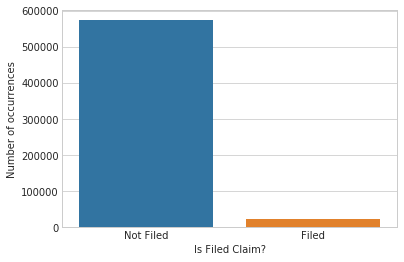

In [7]:
### Target variable exploration
sns.countplot(train_data.target_name);
plt.xlabel('Is Filed Claim?');
plt.ylabel('Number of occurrences');
plt.show()

### Corralation between features (variables)

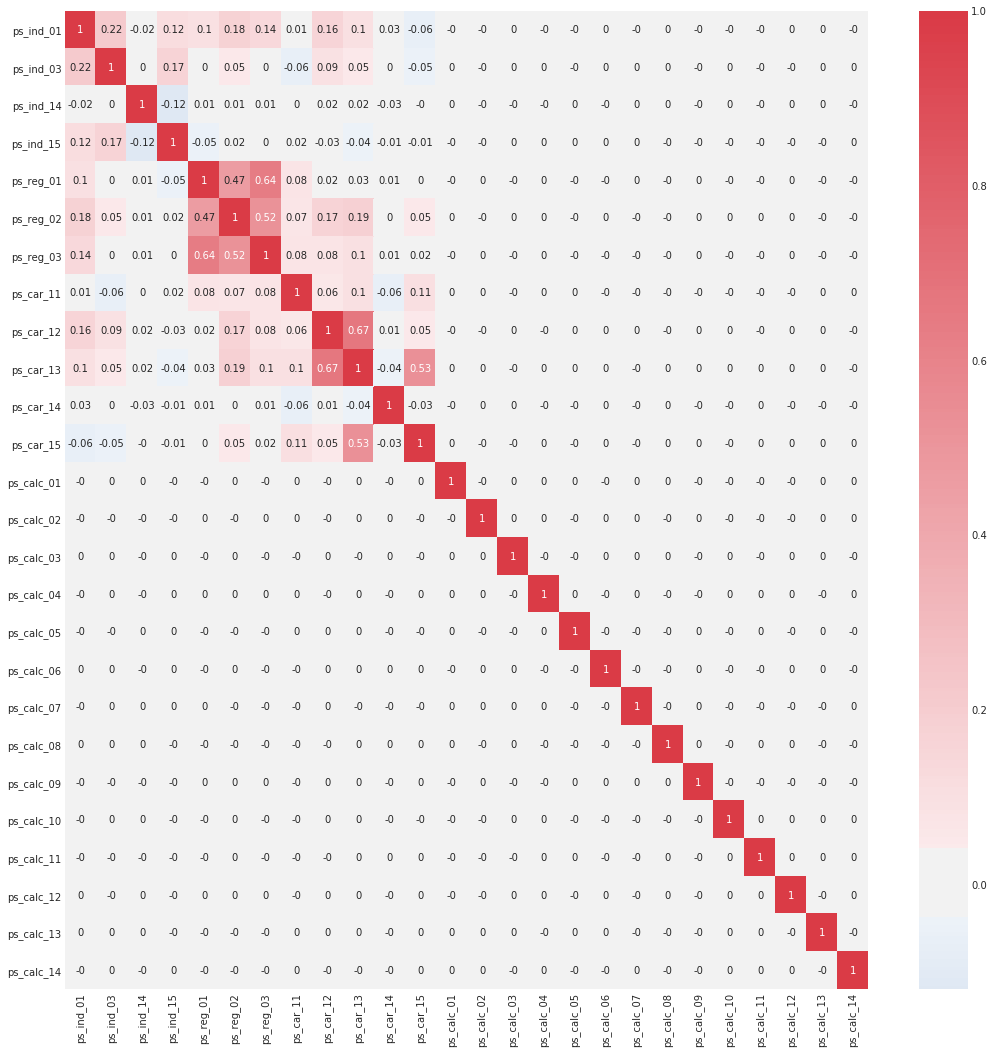

In [8]:
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = train_data[numeric_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

### Numeric Features Exploration

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


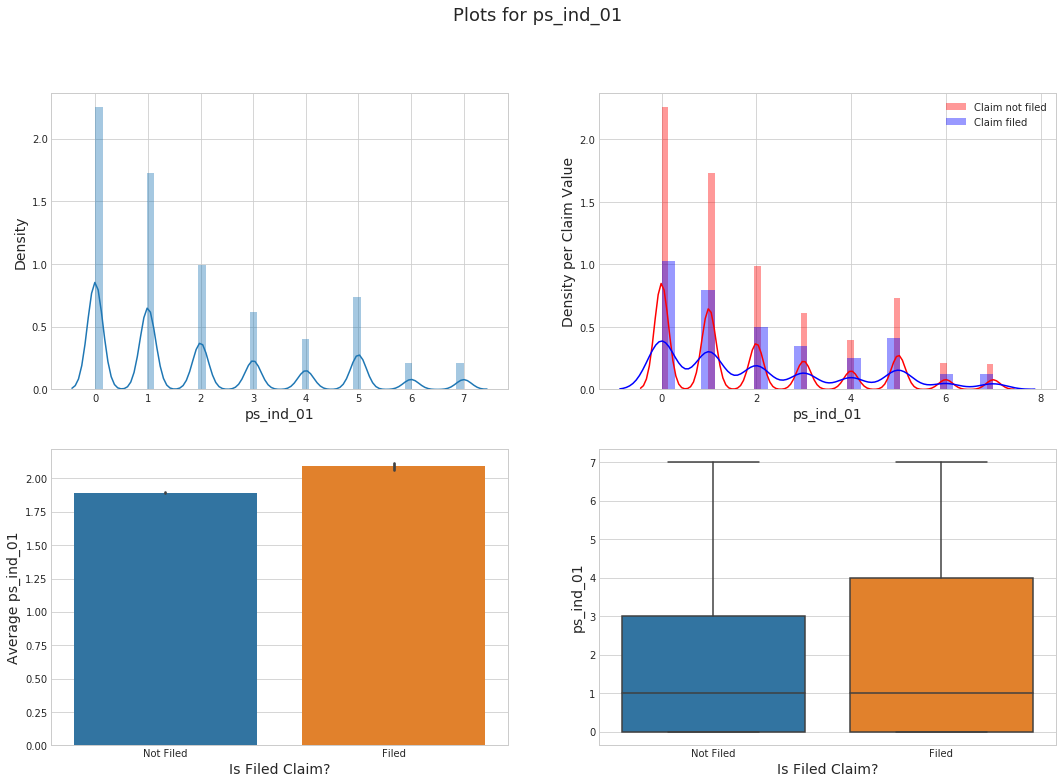

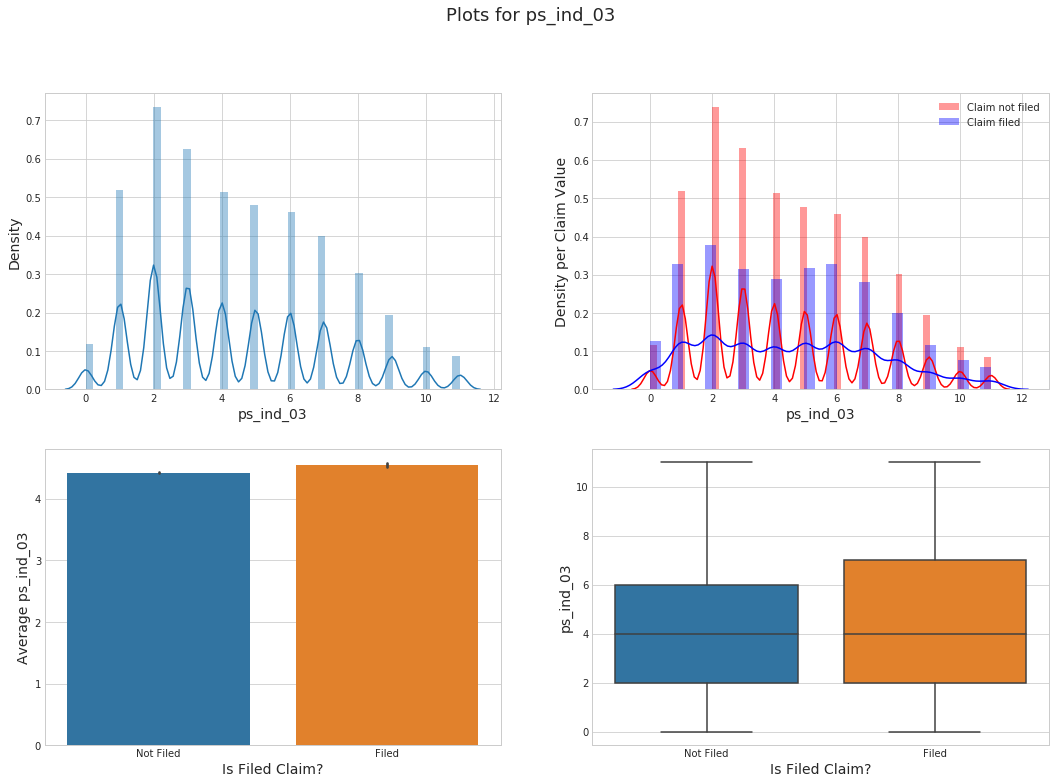

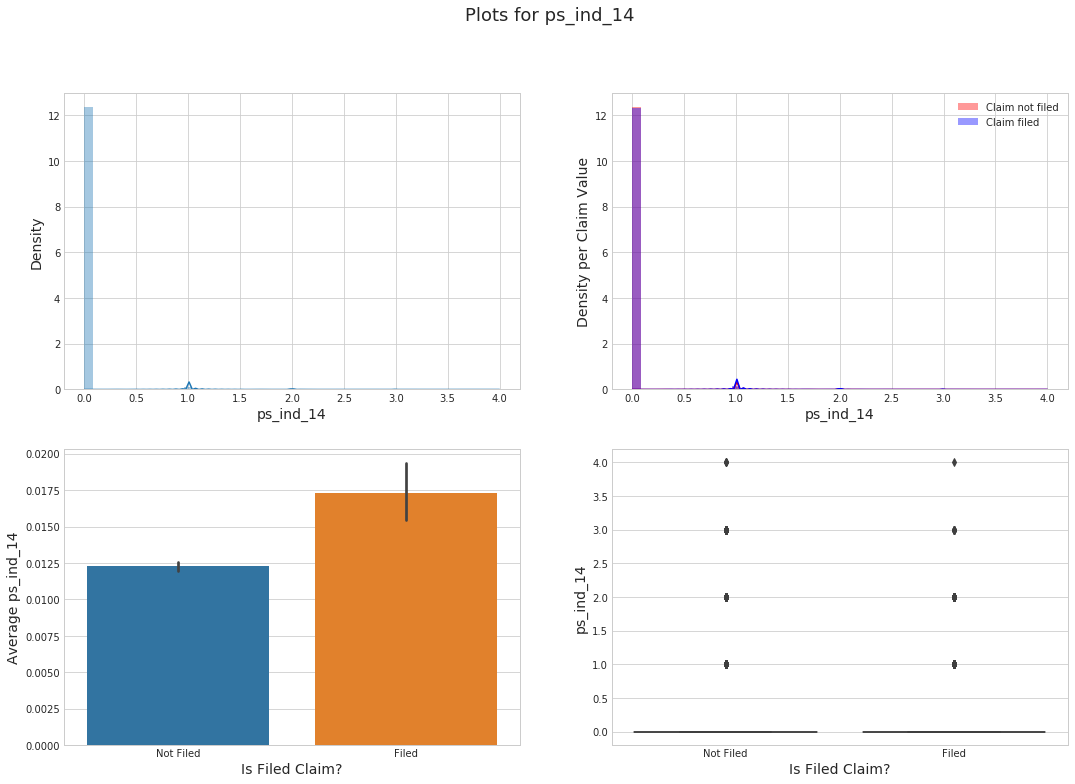

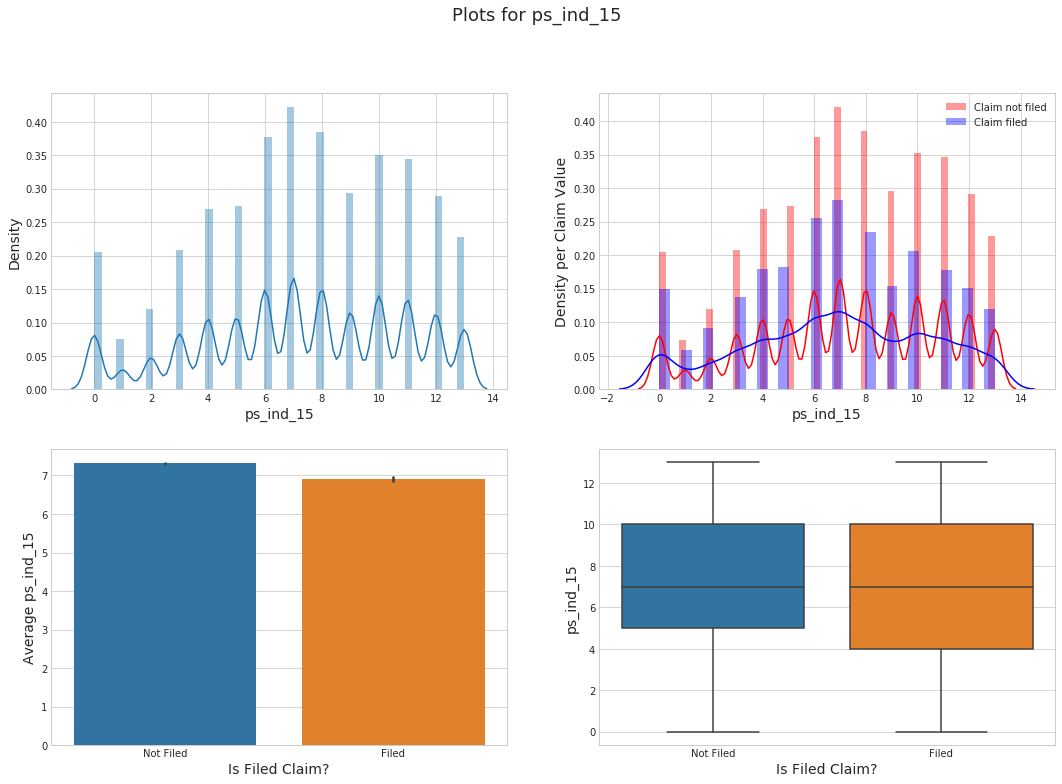

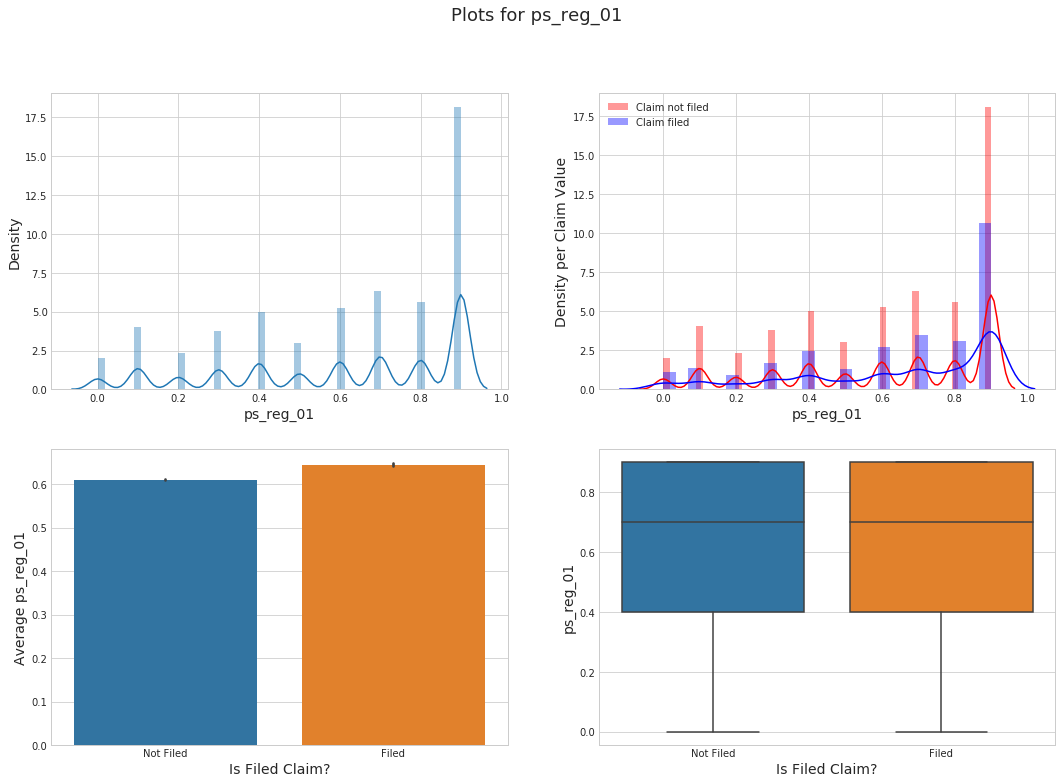

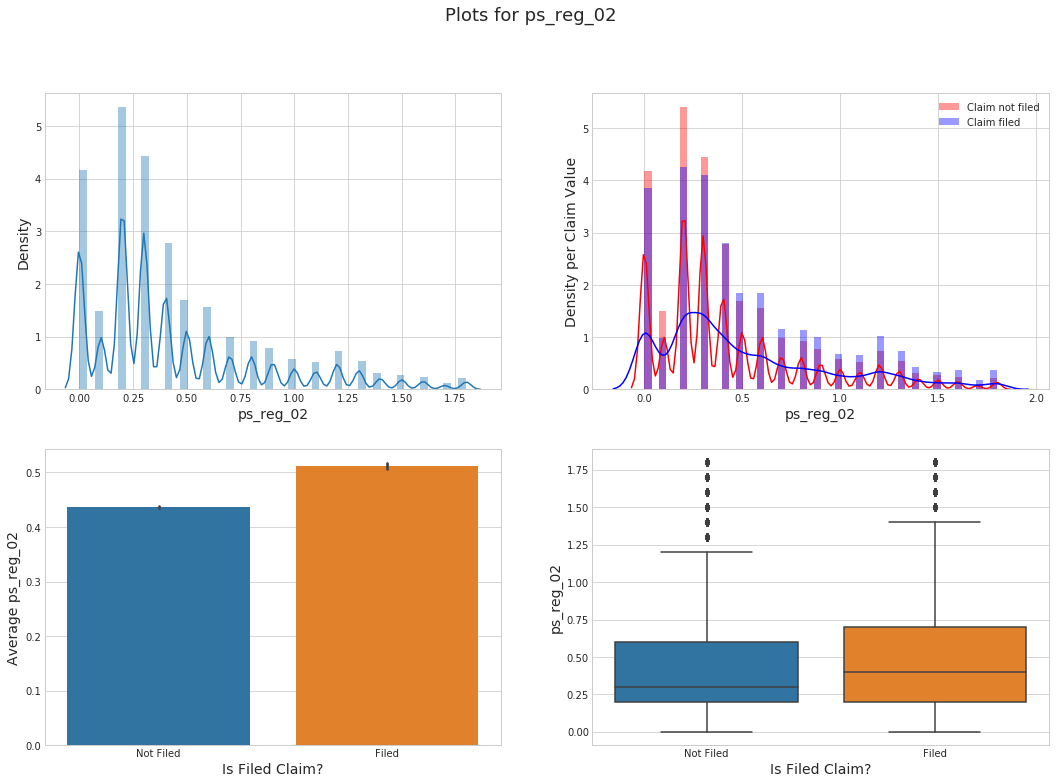

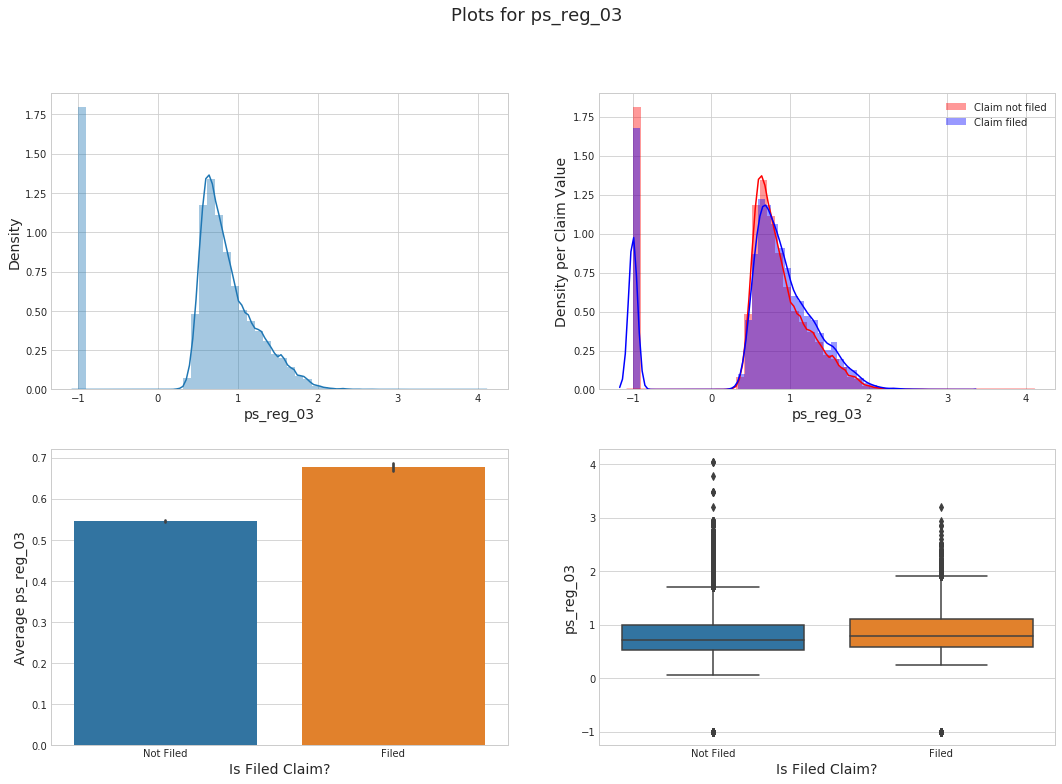

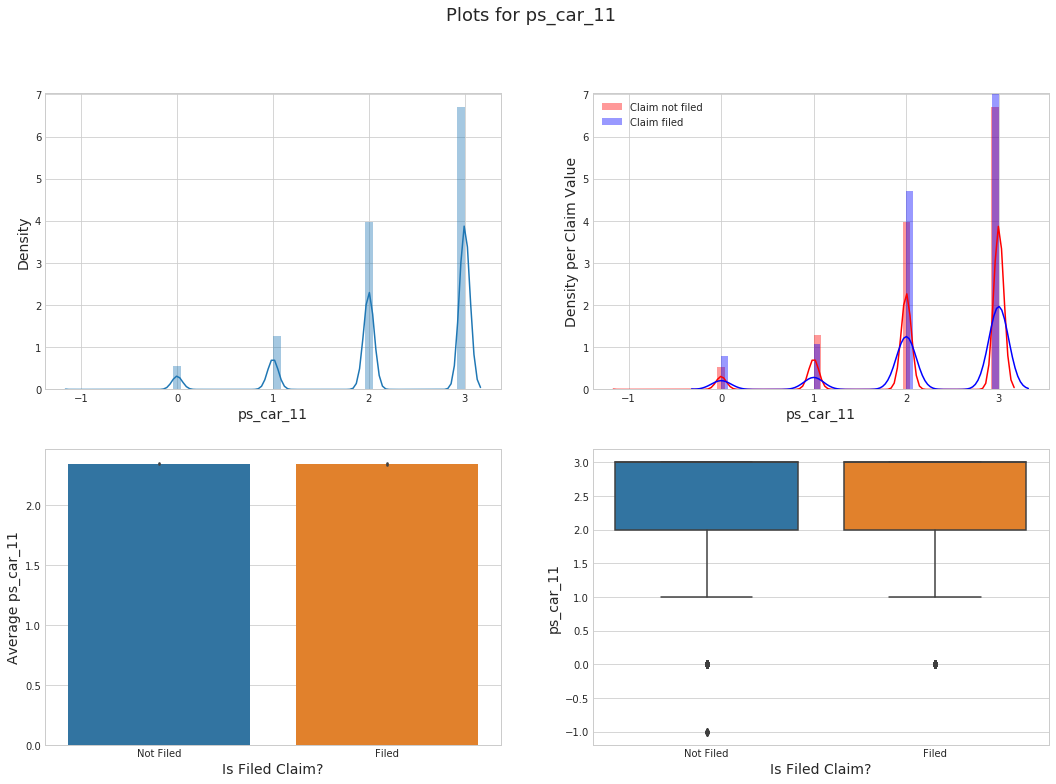

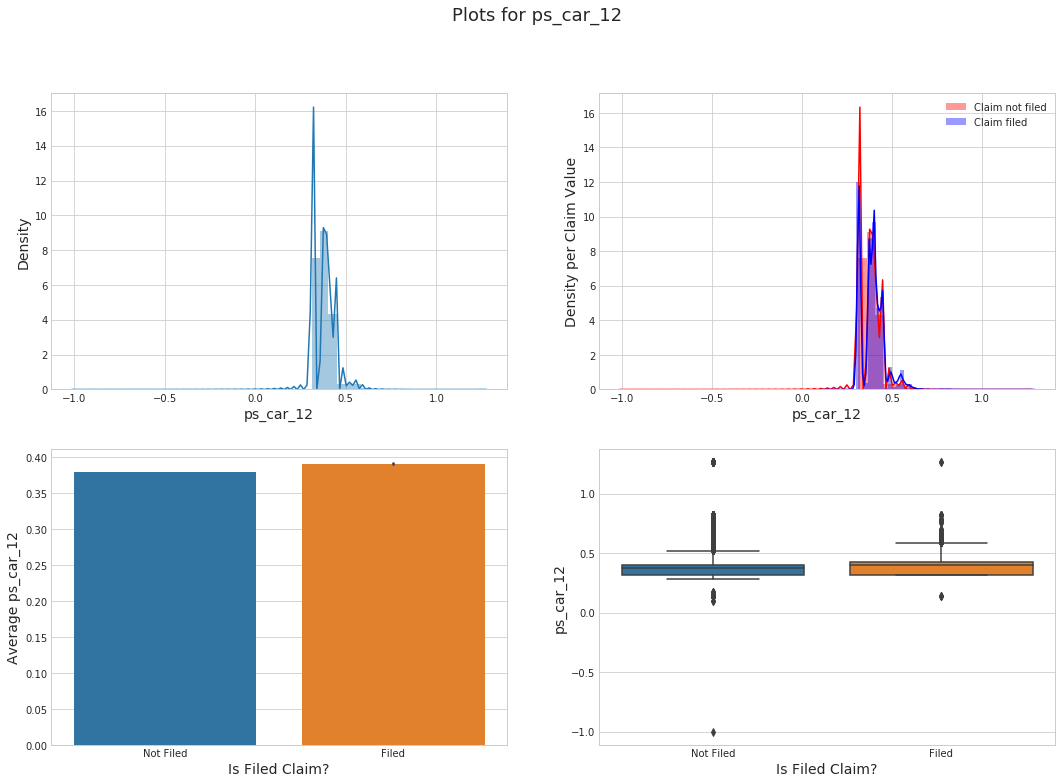

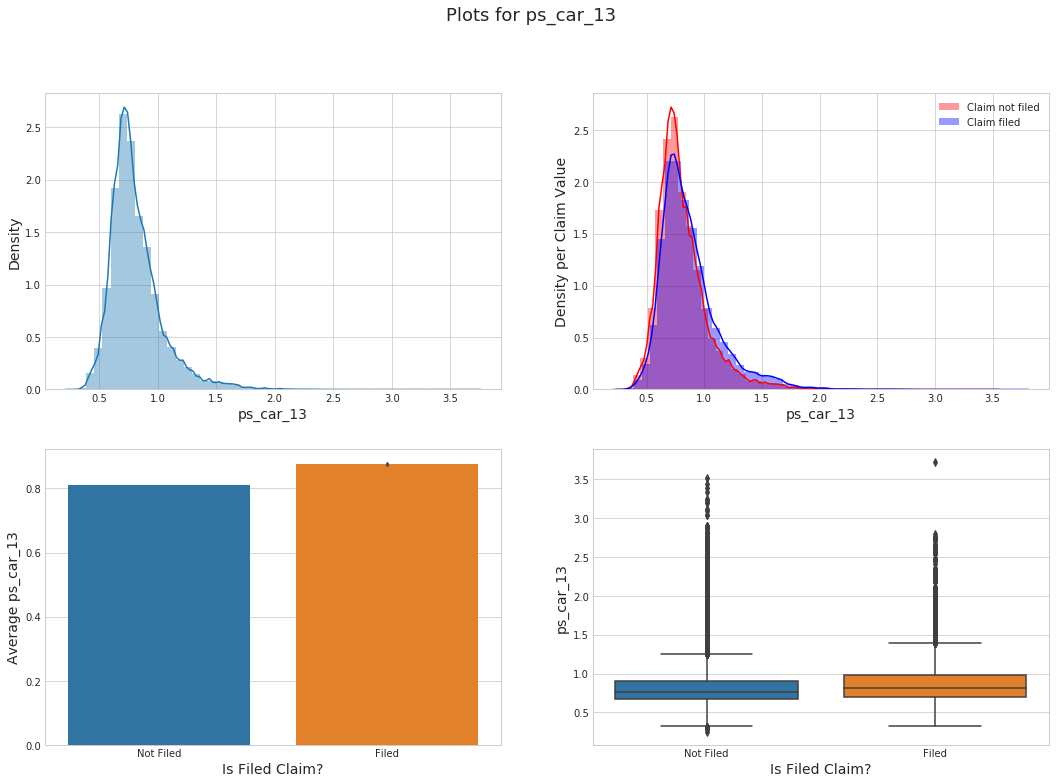

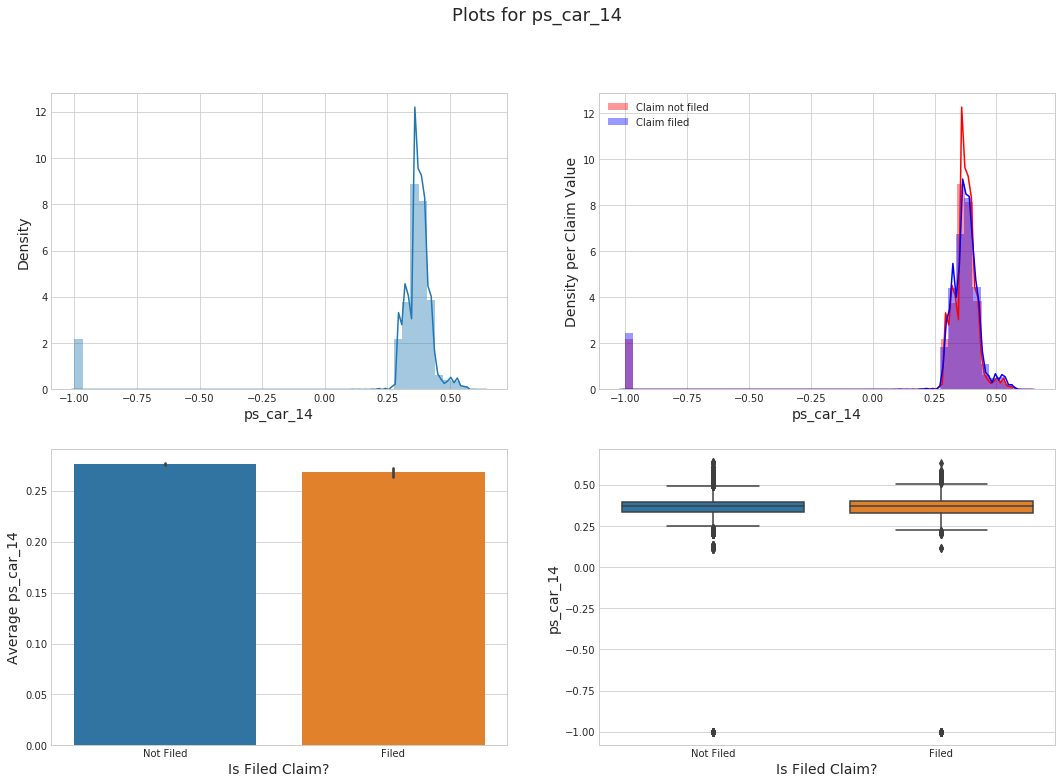

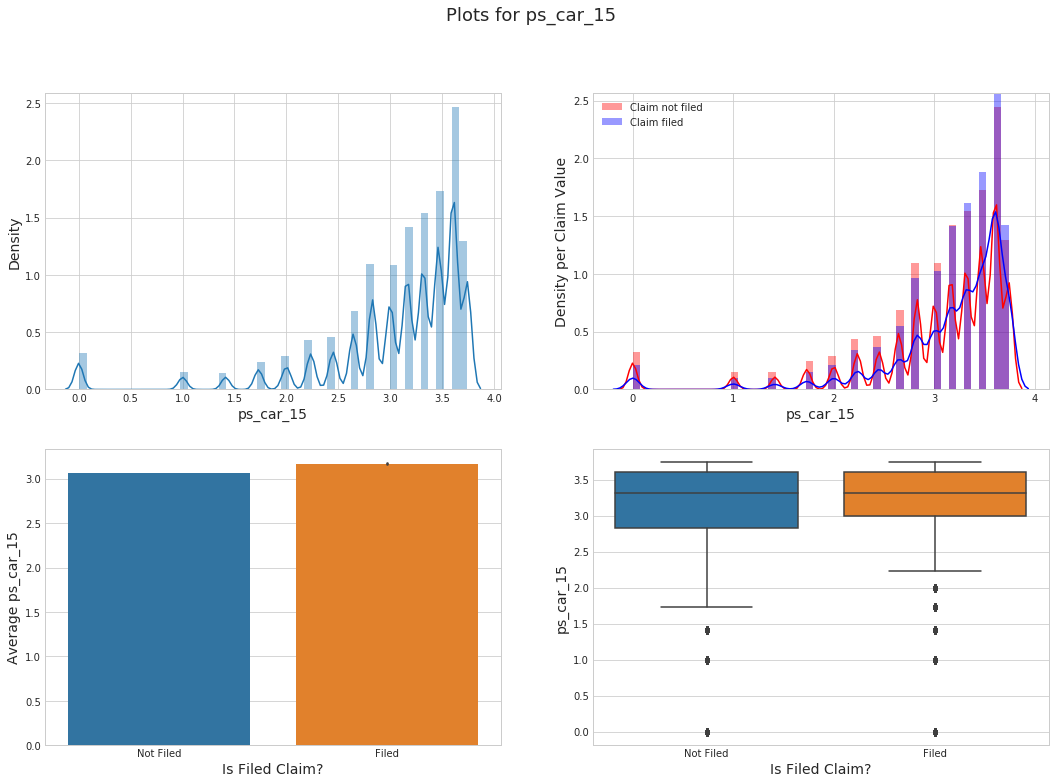

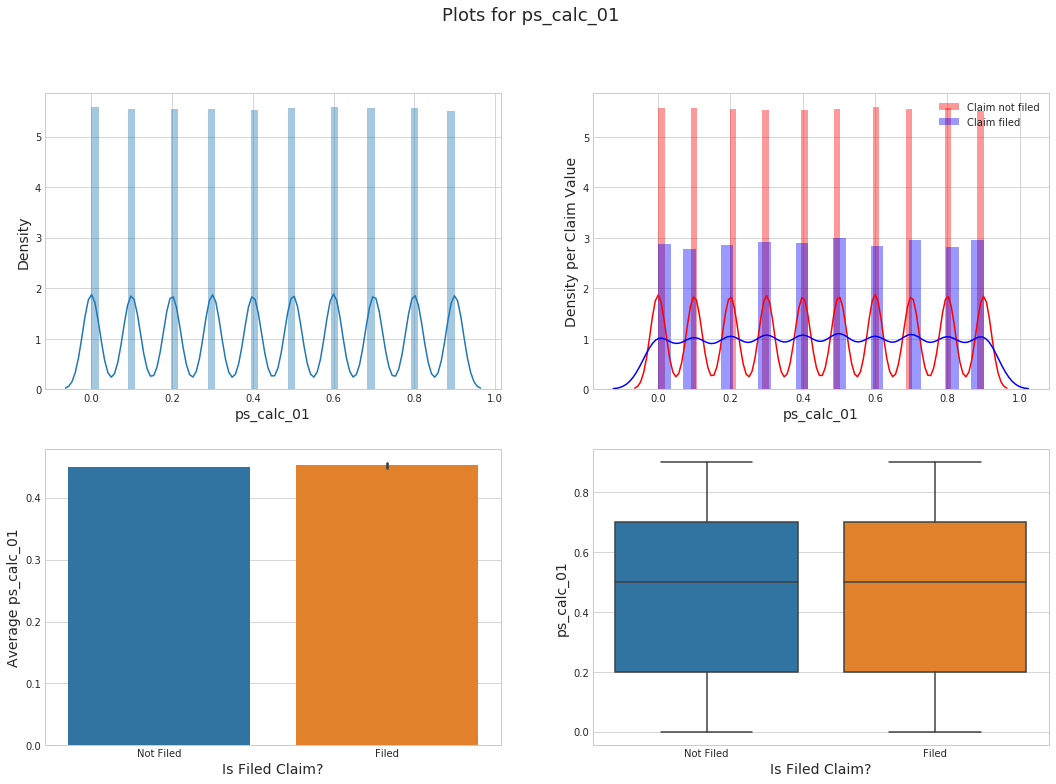

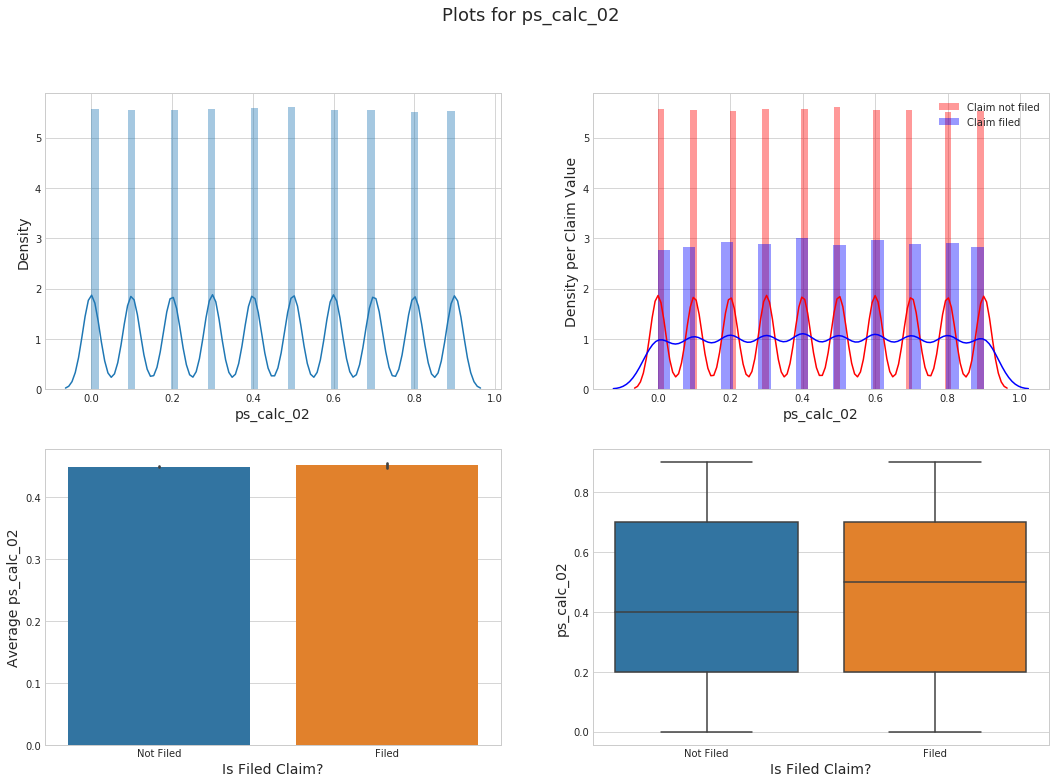

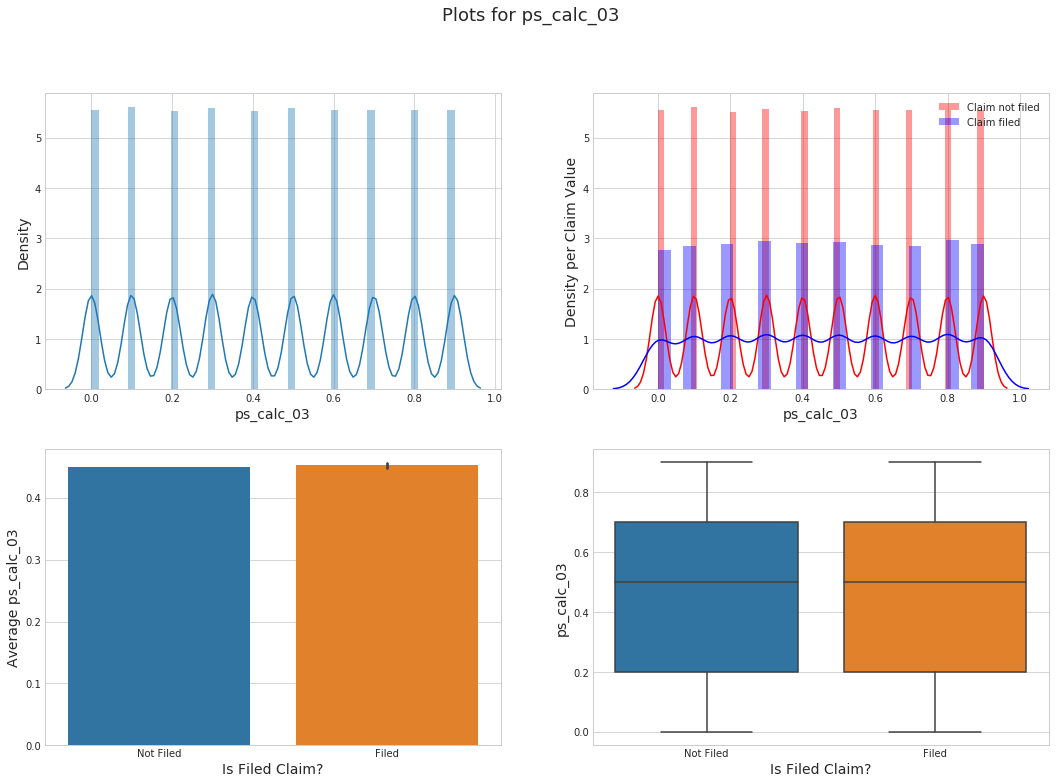

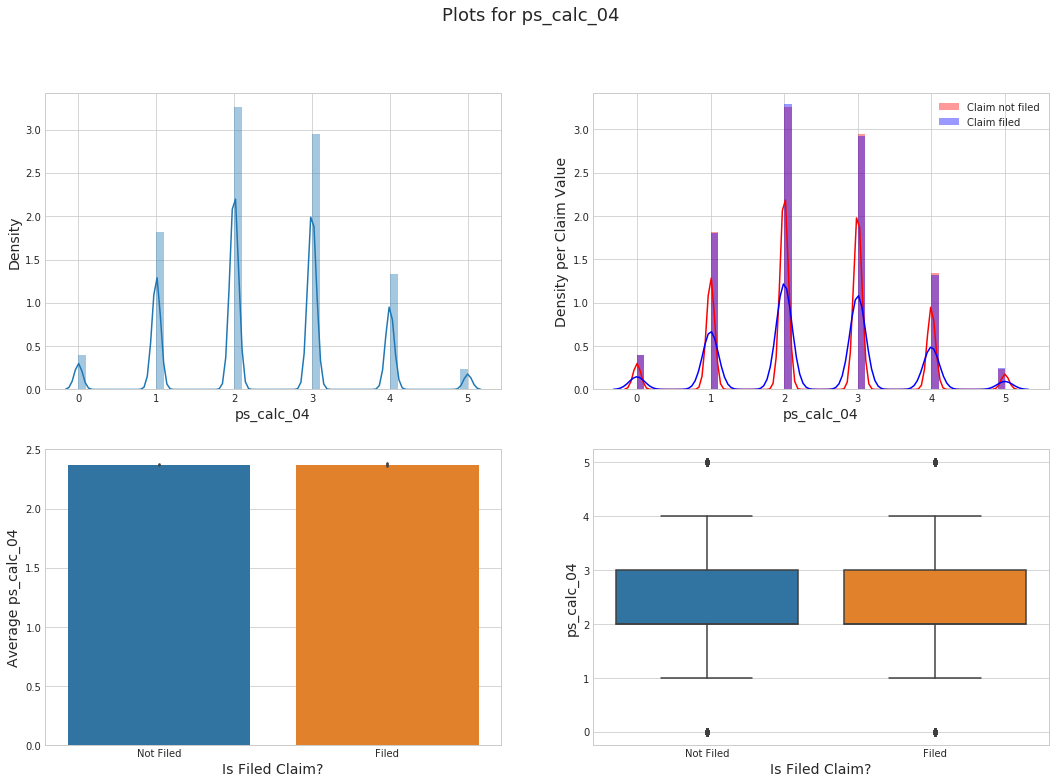

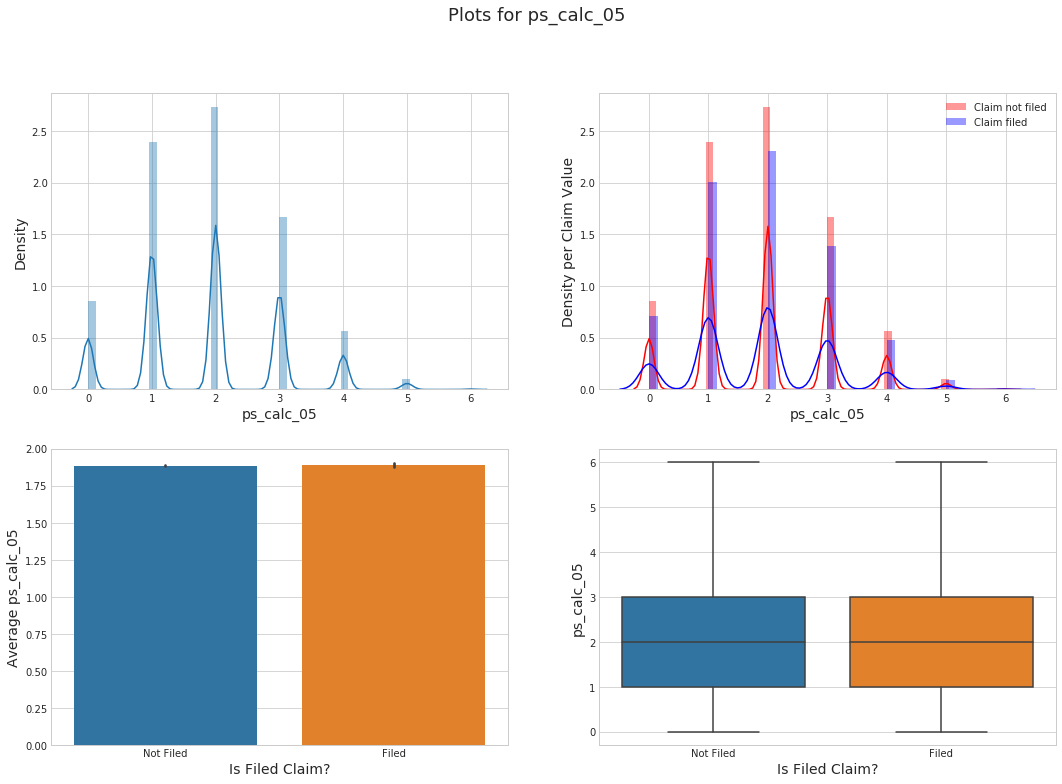

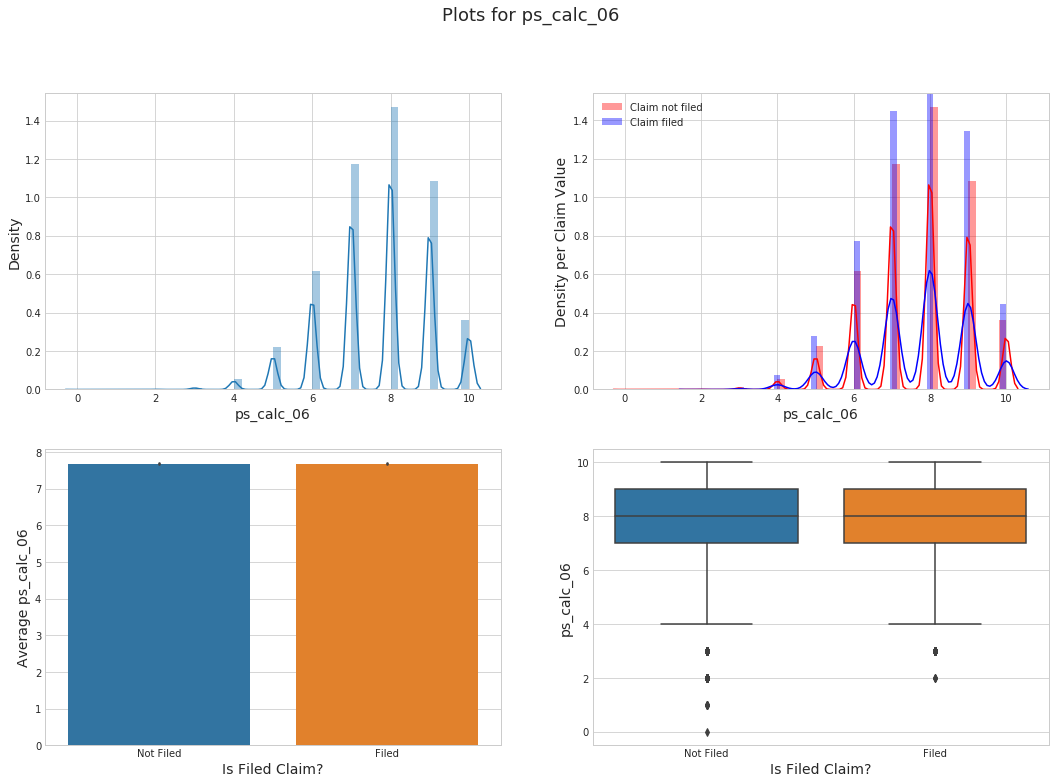

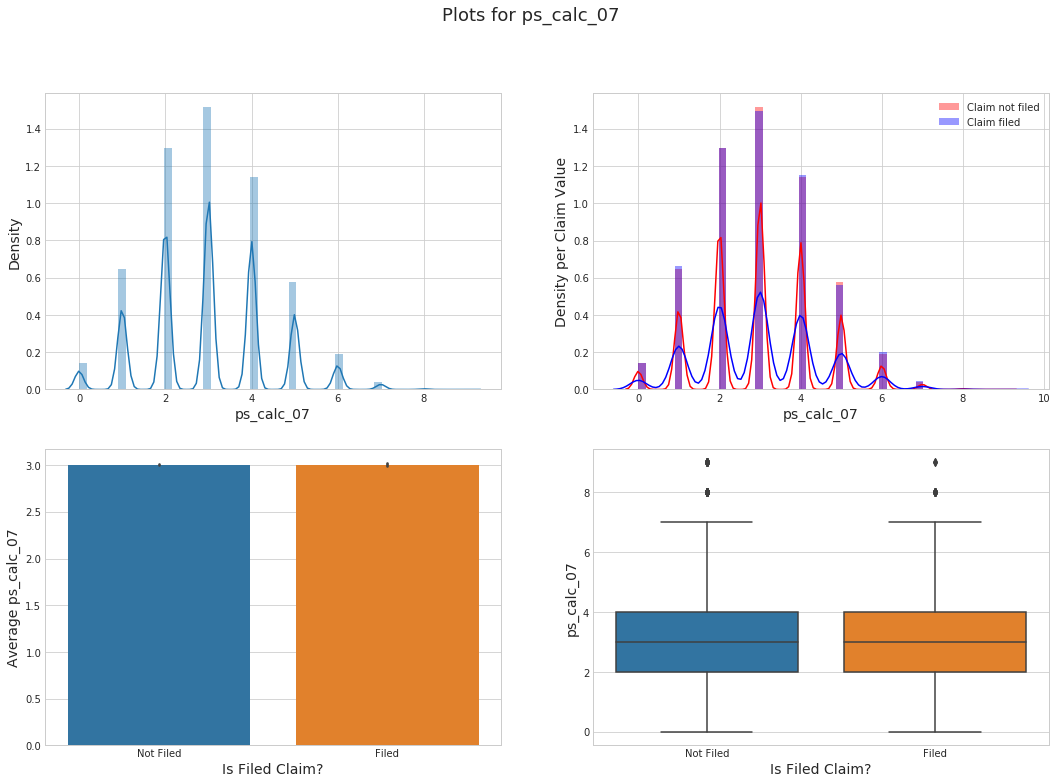

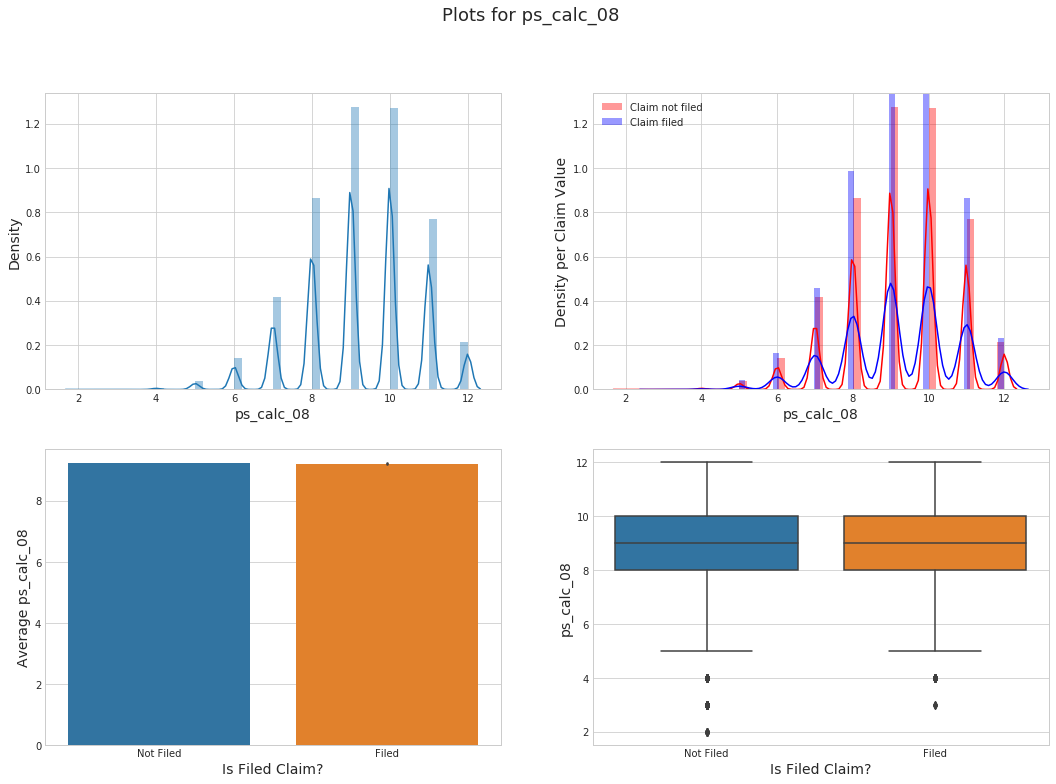

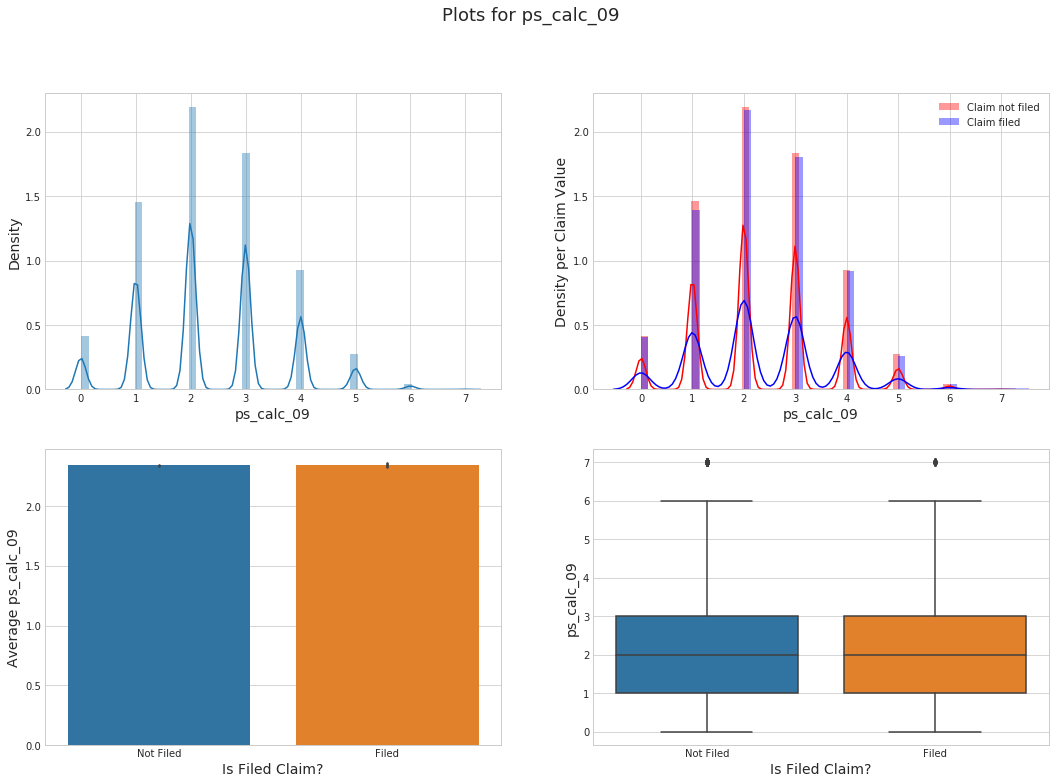

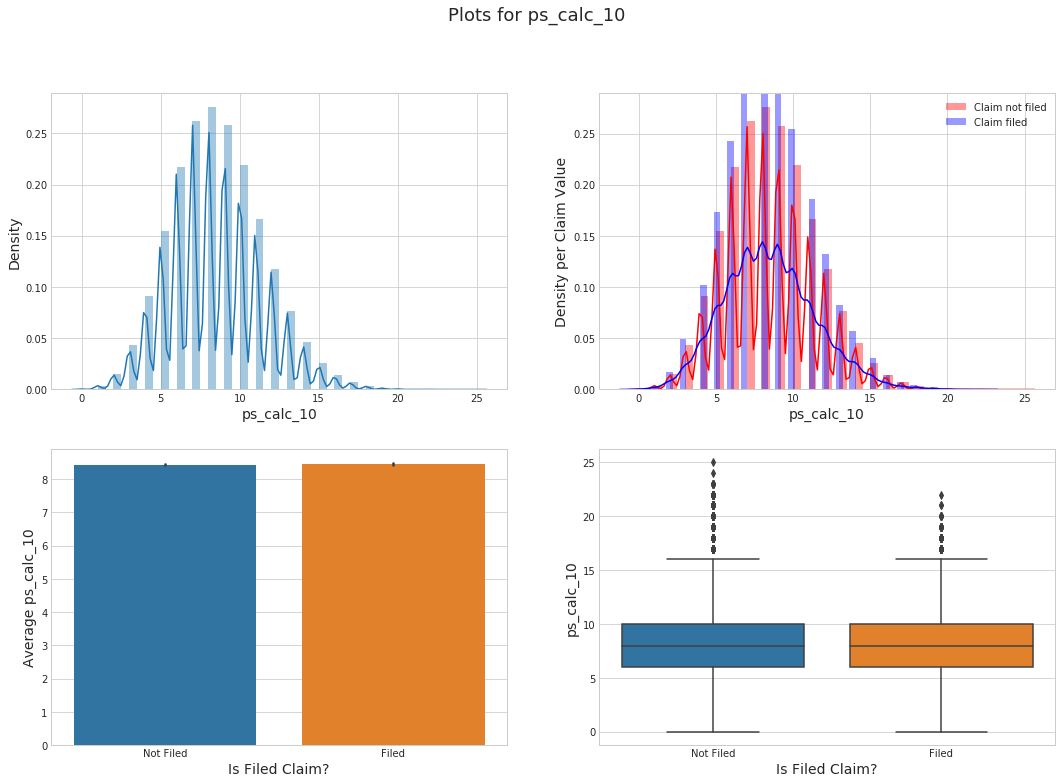

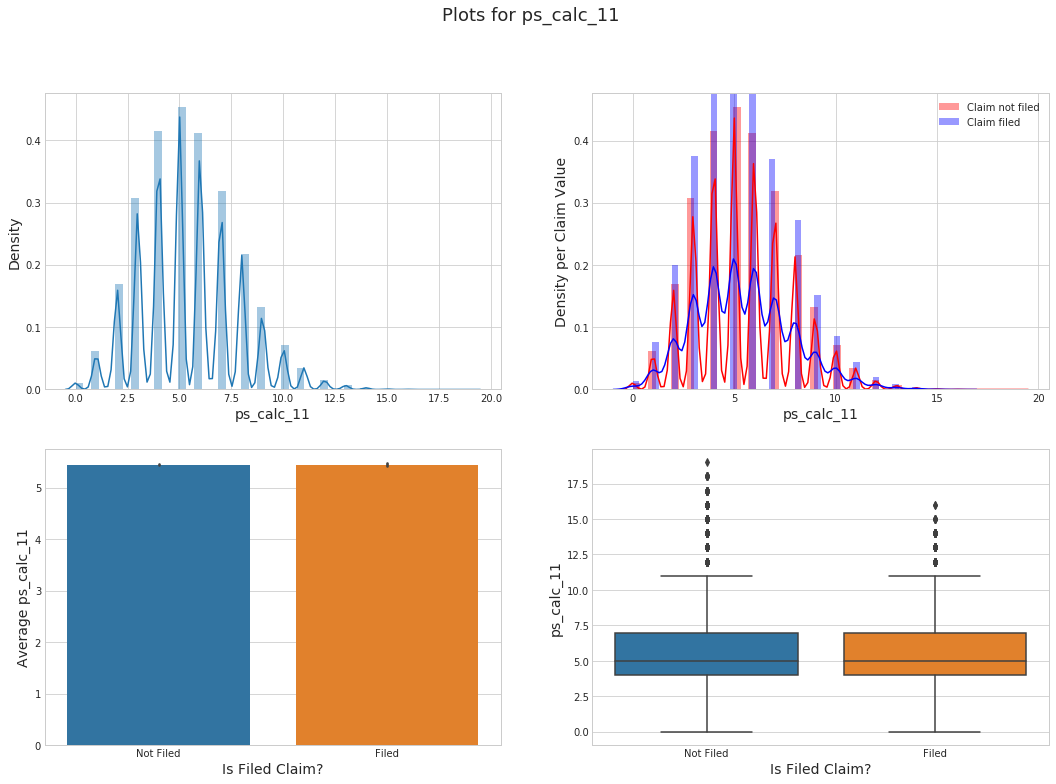

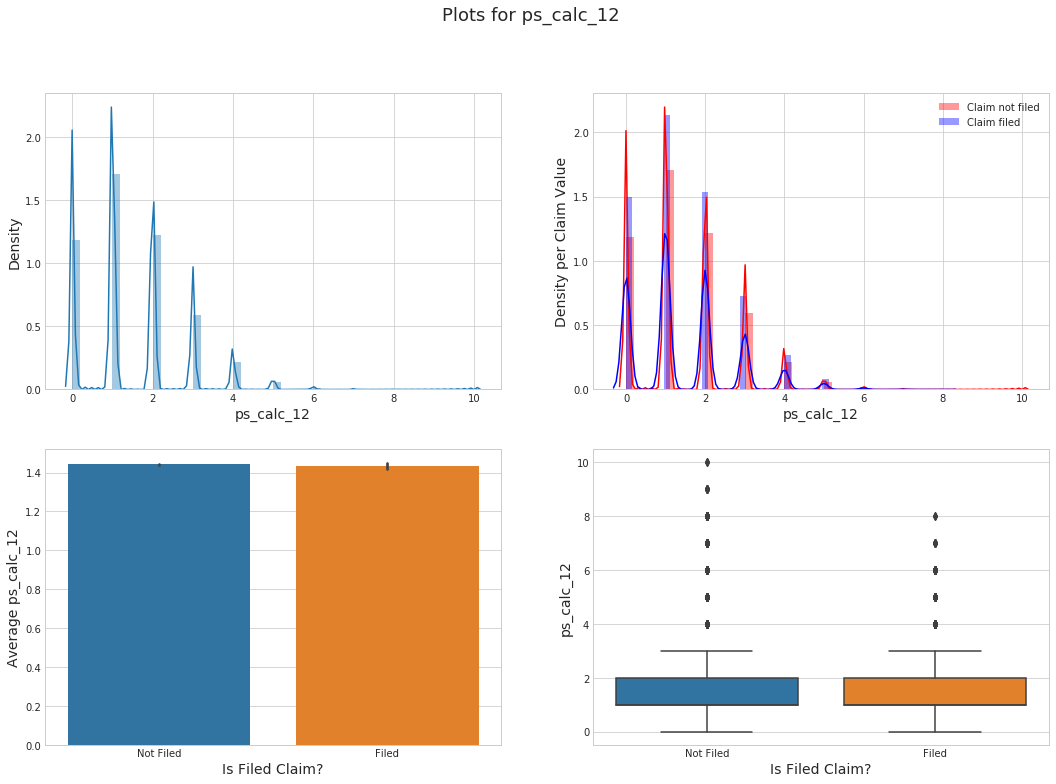

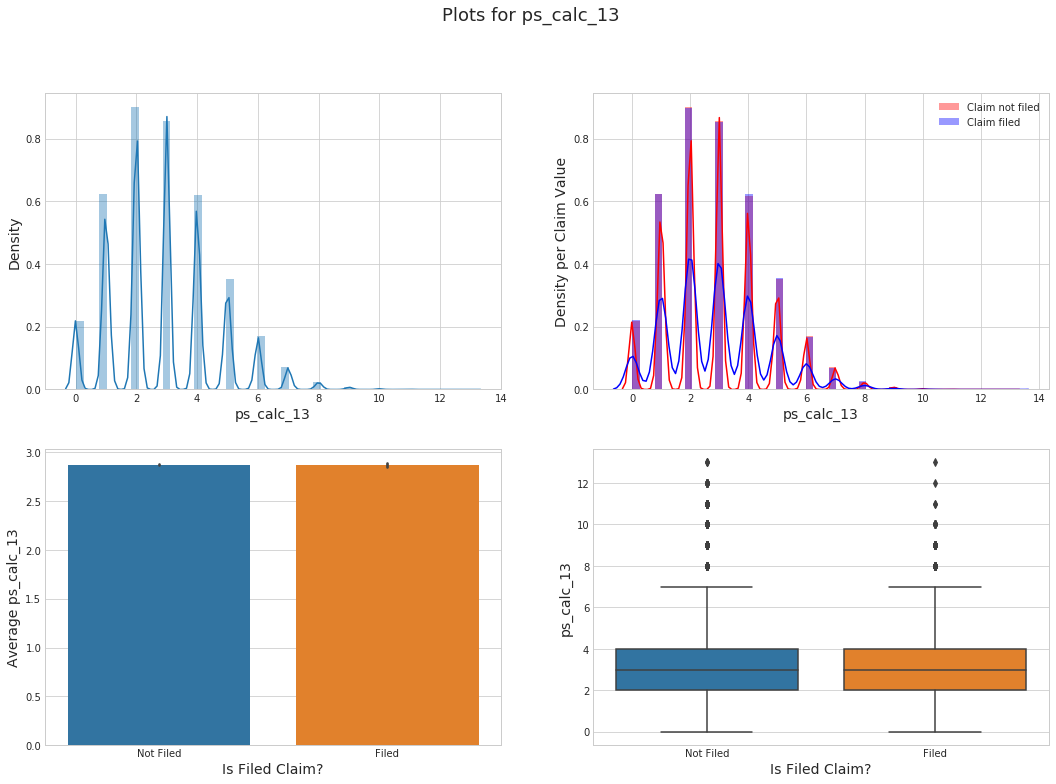

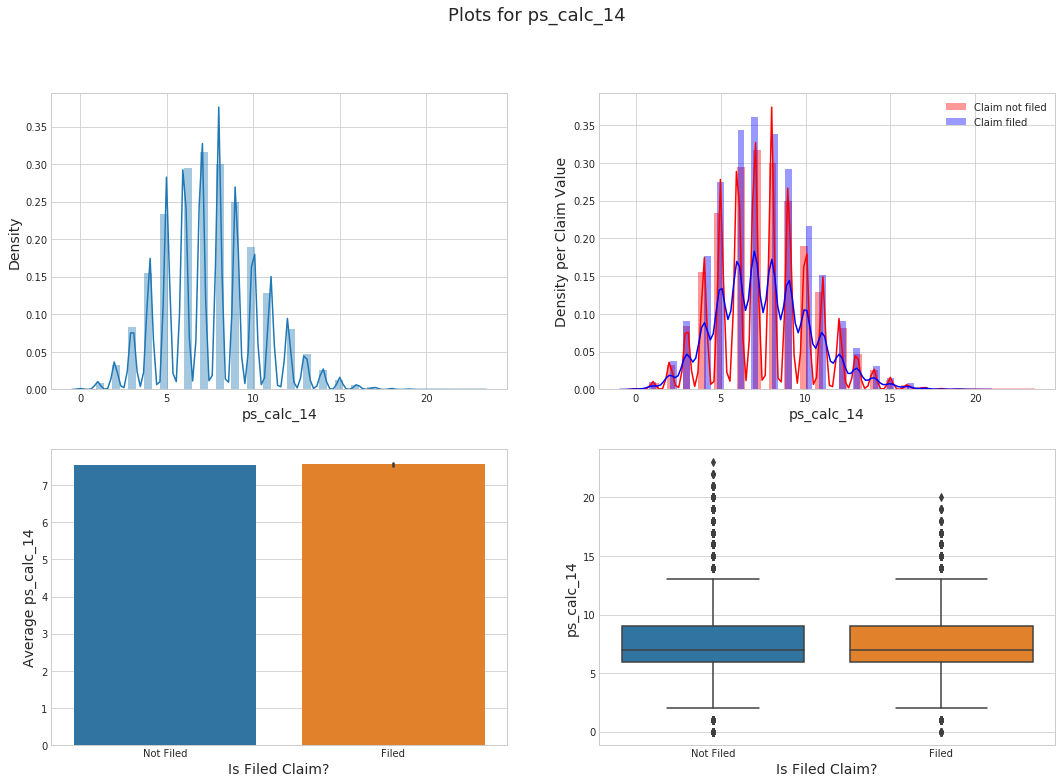

In [9]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(train_data[column], ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Claim Value
    # Claim Not Filed hist
    sns.distplot(train_data.loc[train_data.target==0, column], color='red', label='Claim not filed', ax=plt.subplot(222));
    # Claim Filed hist
    sns.distplot(train_data.loc[train_data.target==1, column], color='blue', label='Claim filed', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Claim Value', fontsize=14);
    
    ### Average Column value per Claim Value
    sns.barplot(x="target_name", y=column, data=train_data, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Claim Value
    sns.boxplot(x="target_name", y=column, data=train_data, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

### Categorical Features Exploration

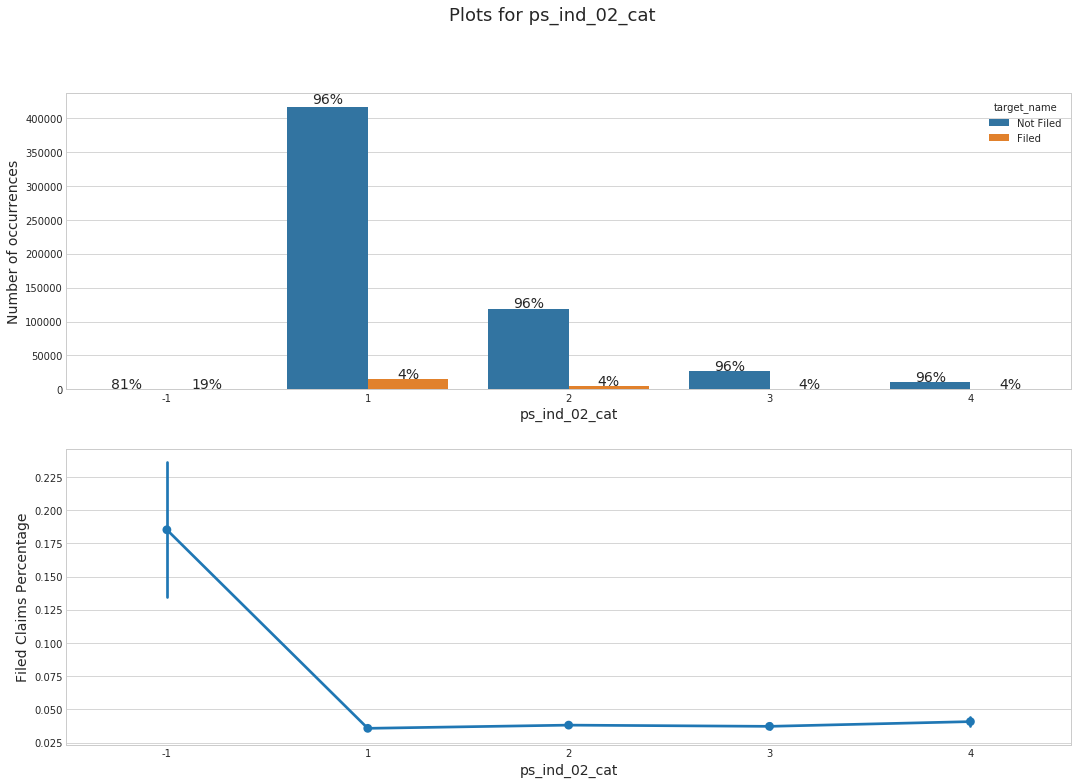

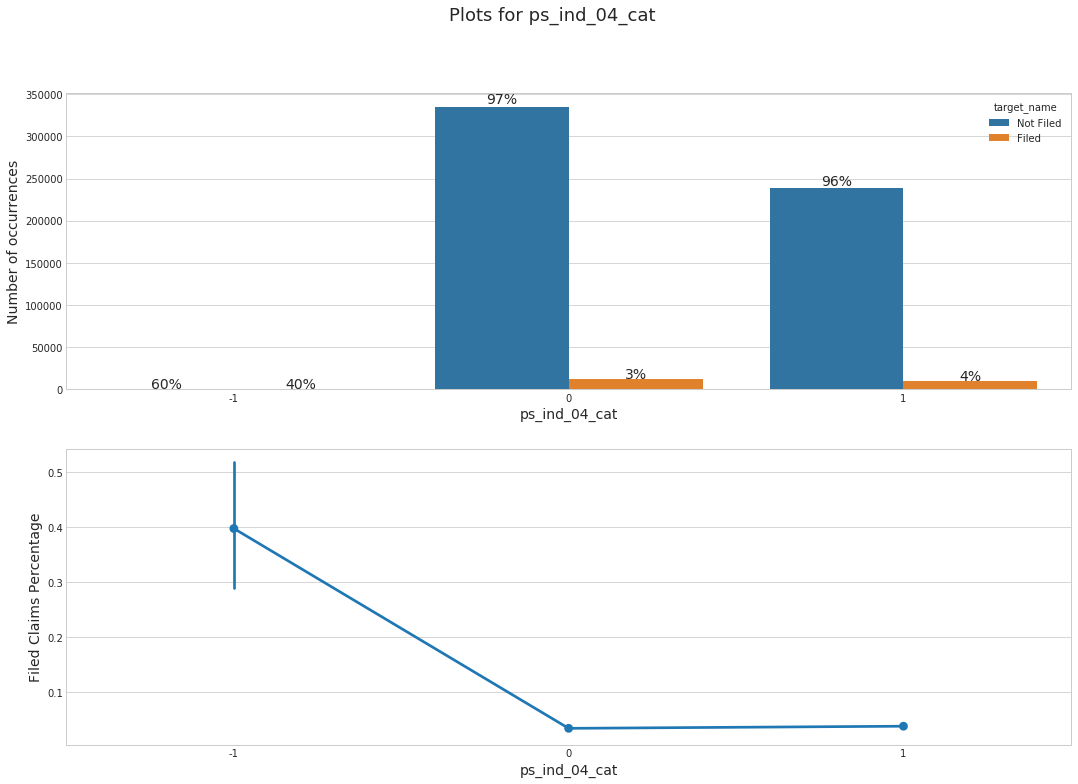

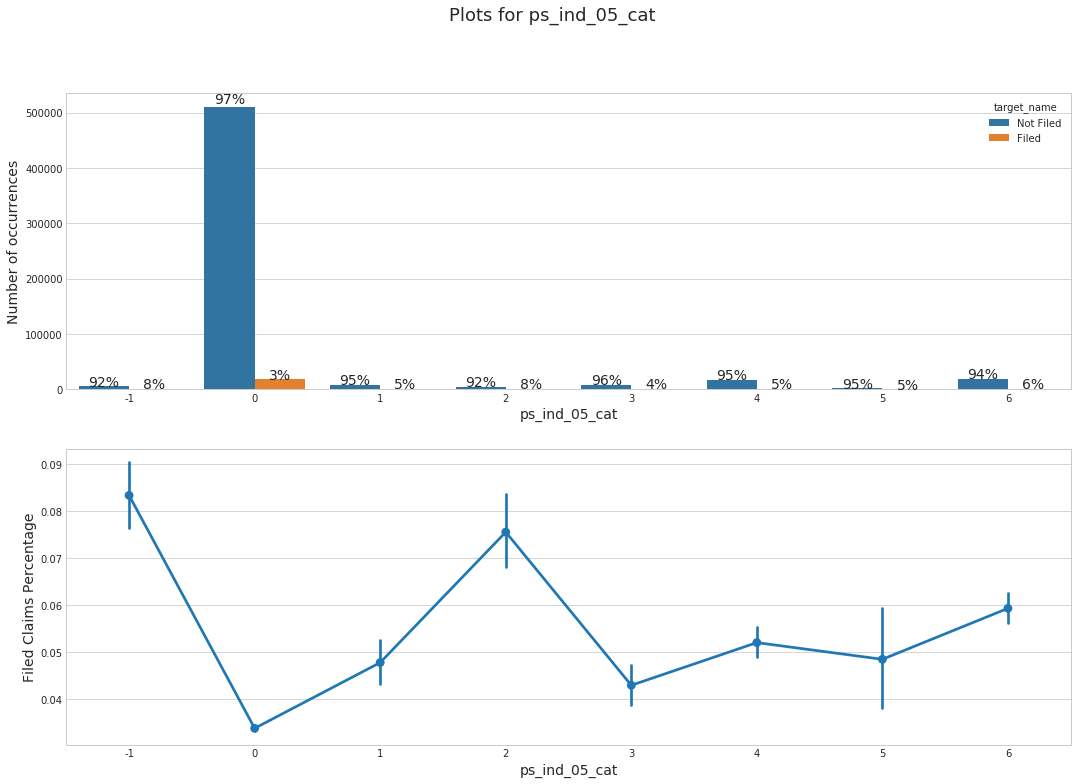

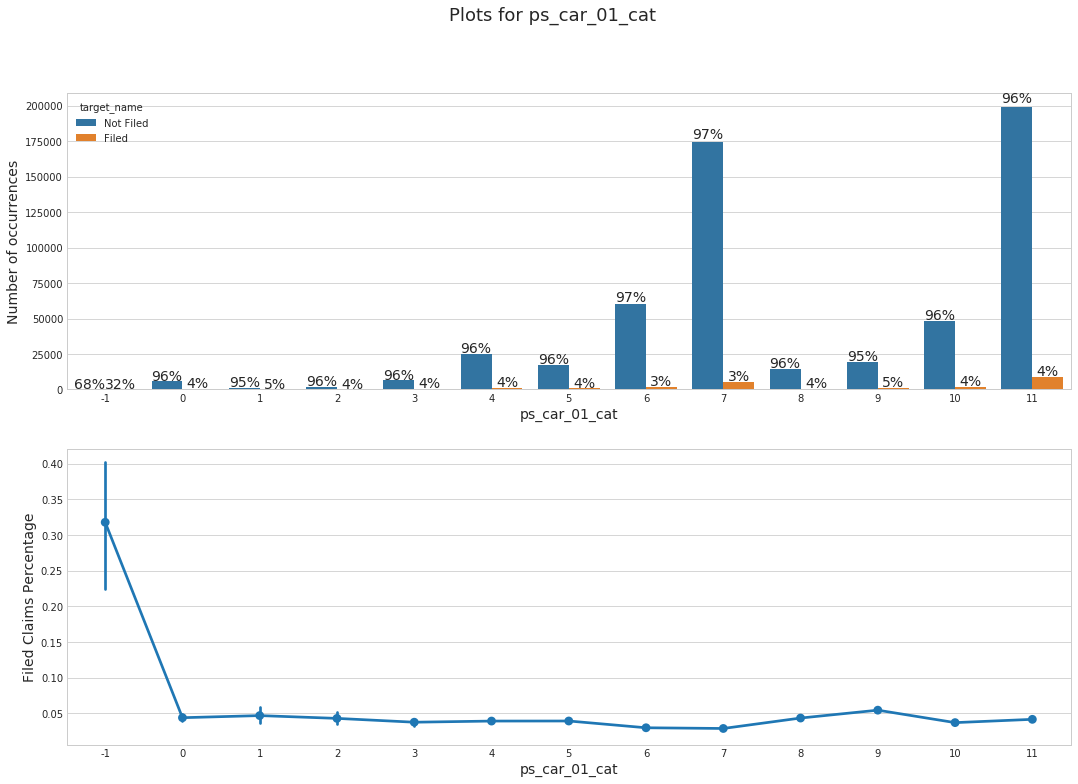

ValueError: posx and posy should be finite values

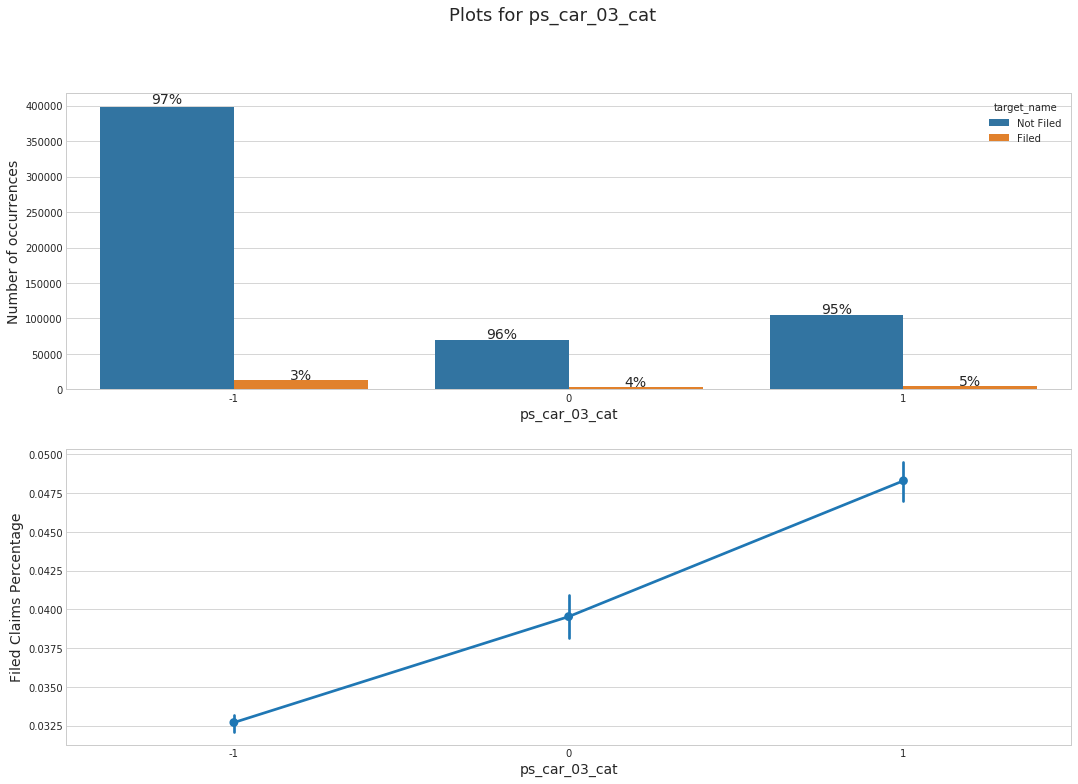

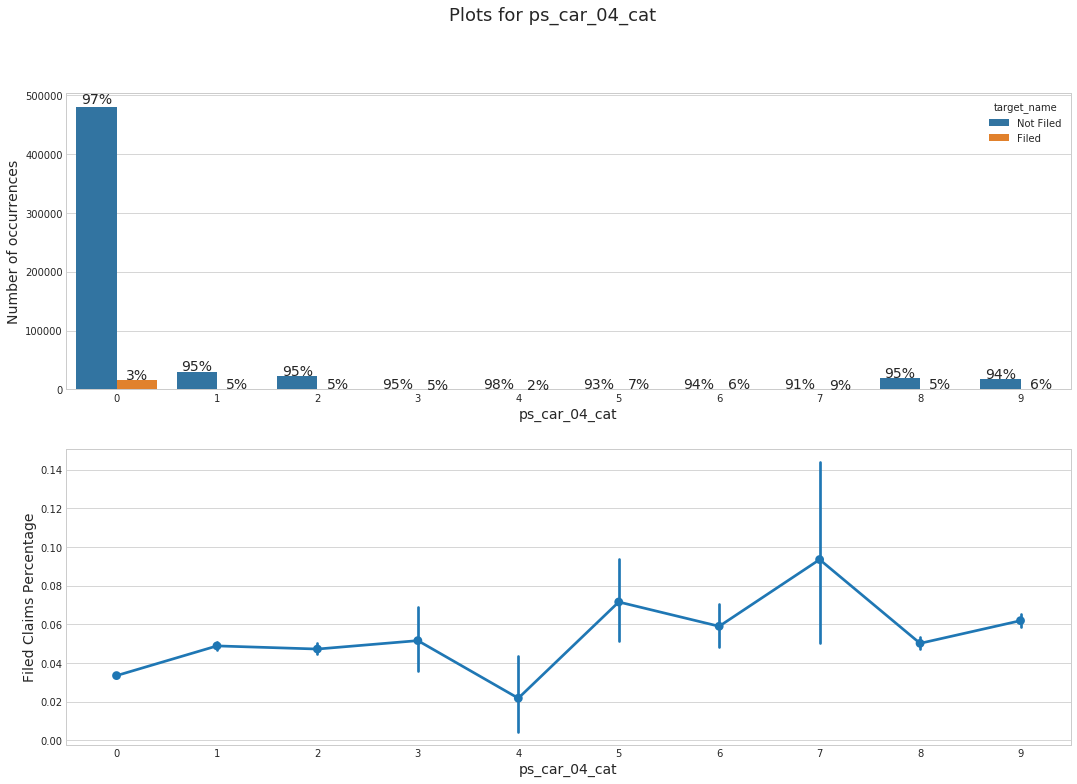

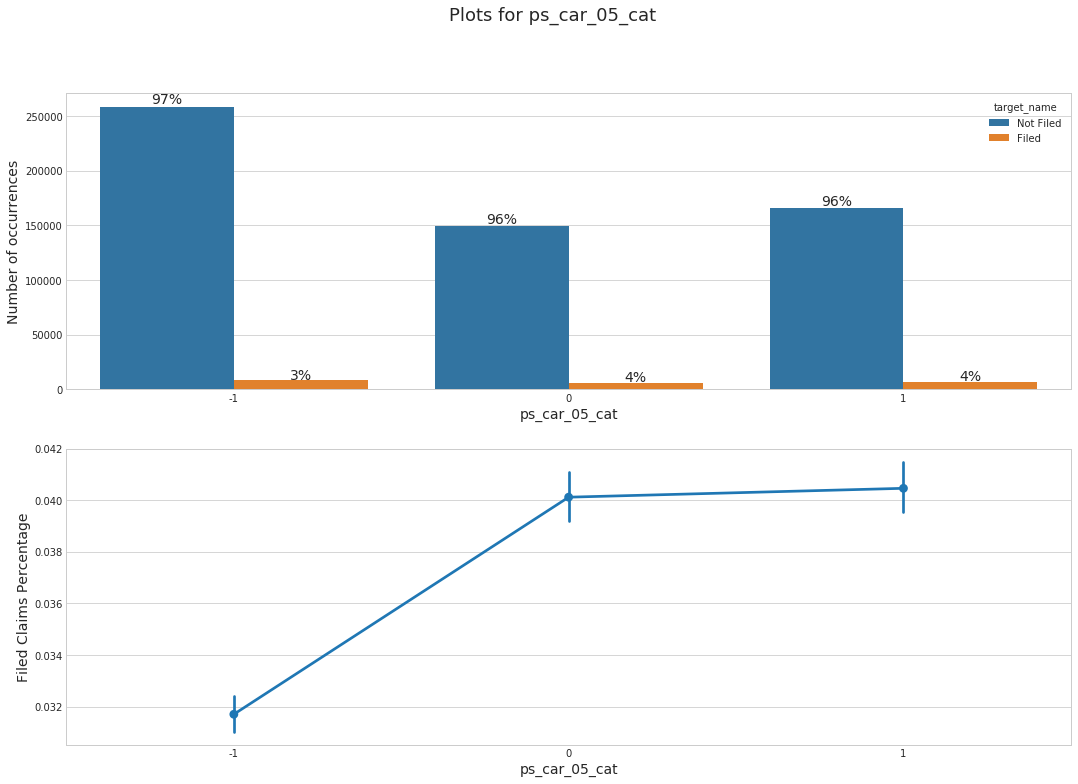

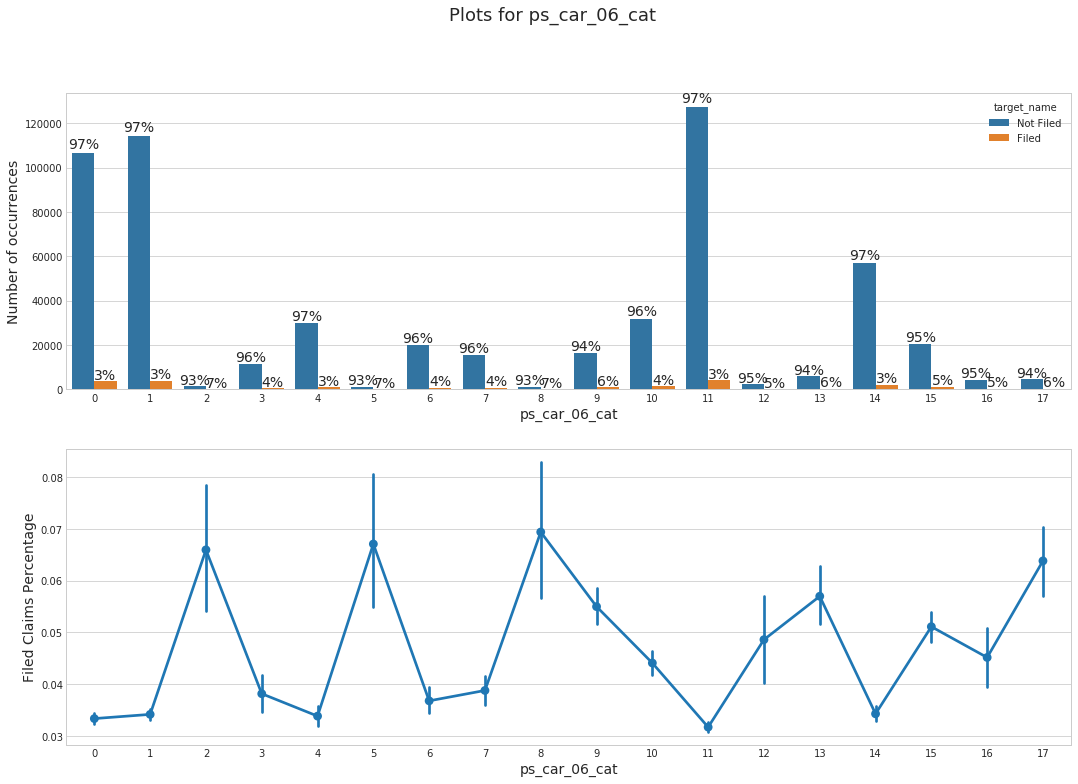

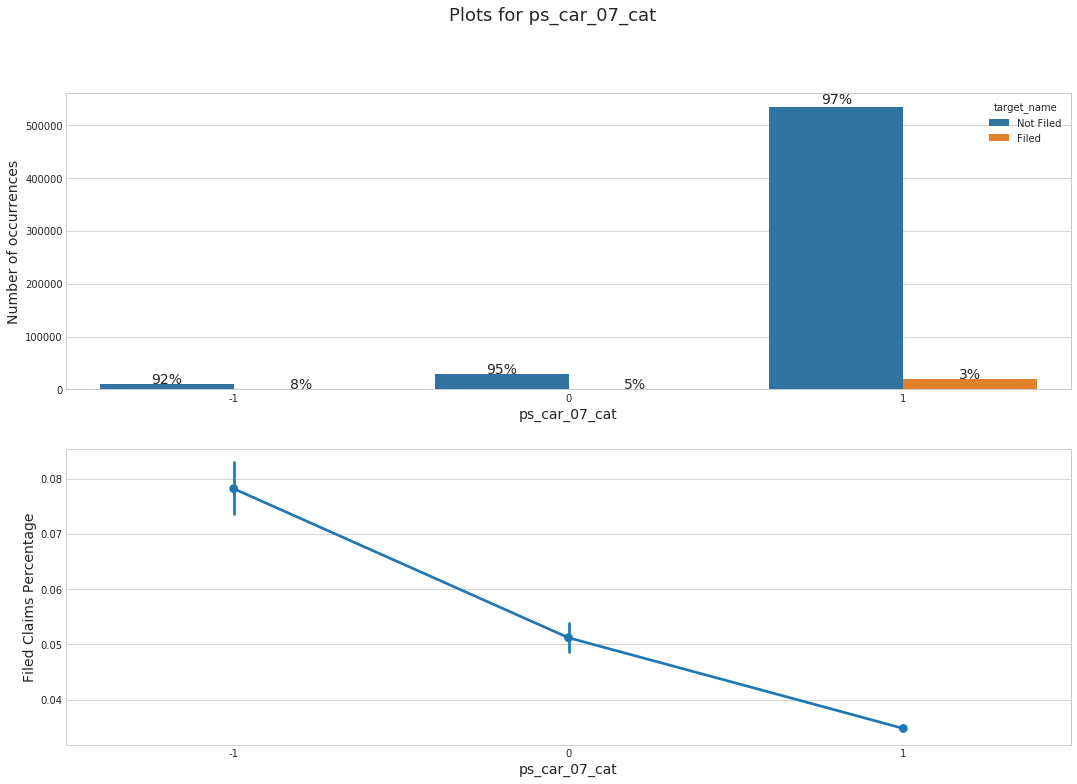

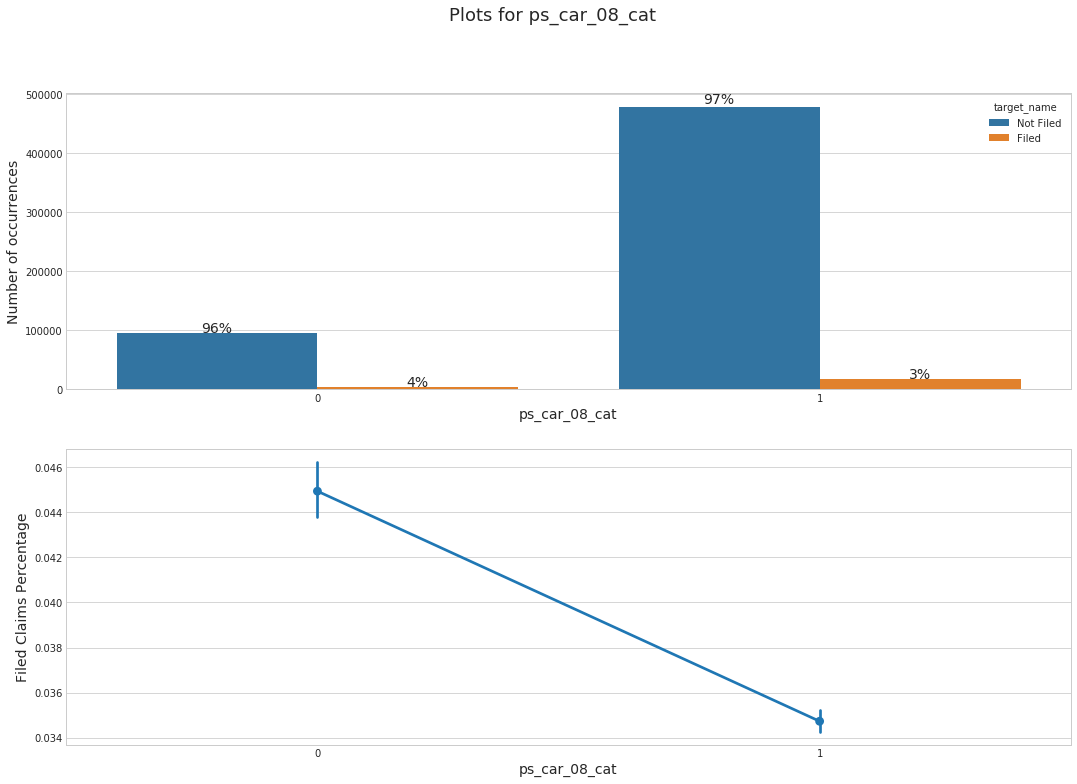

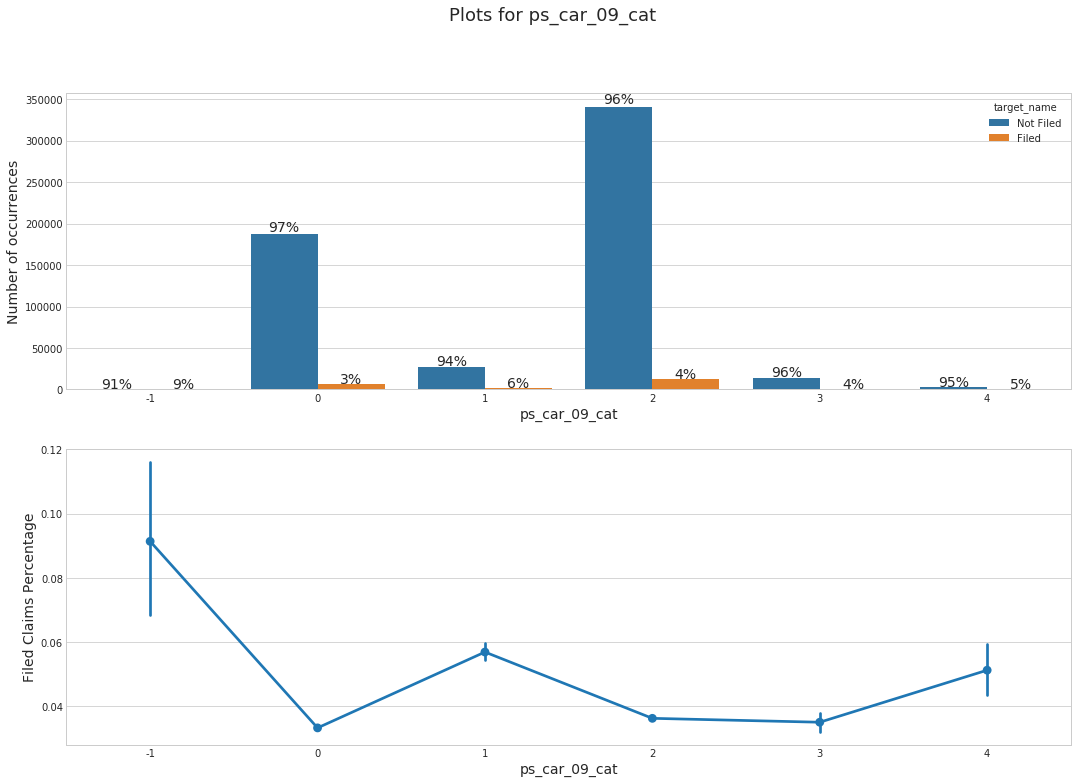

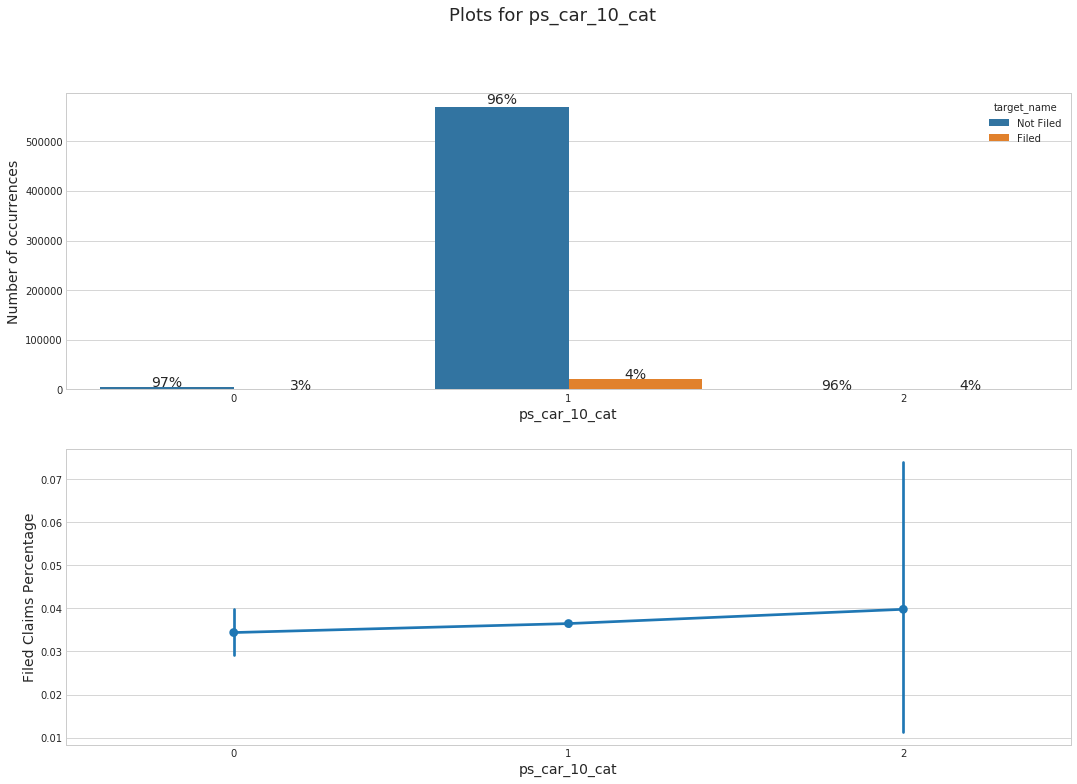

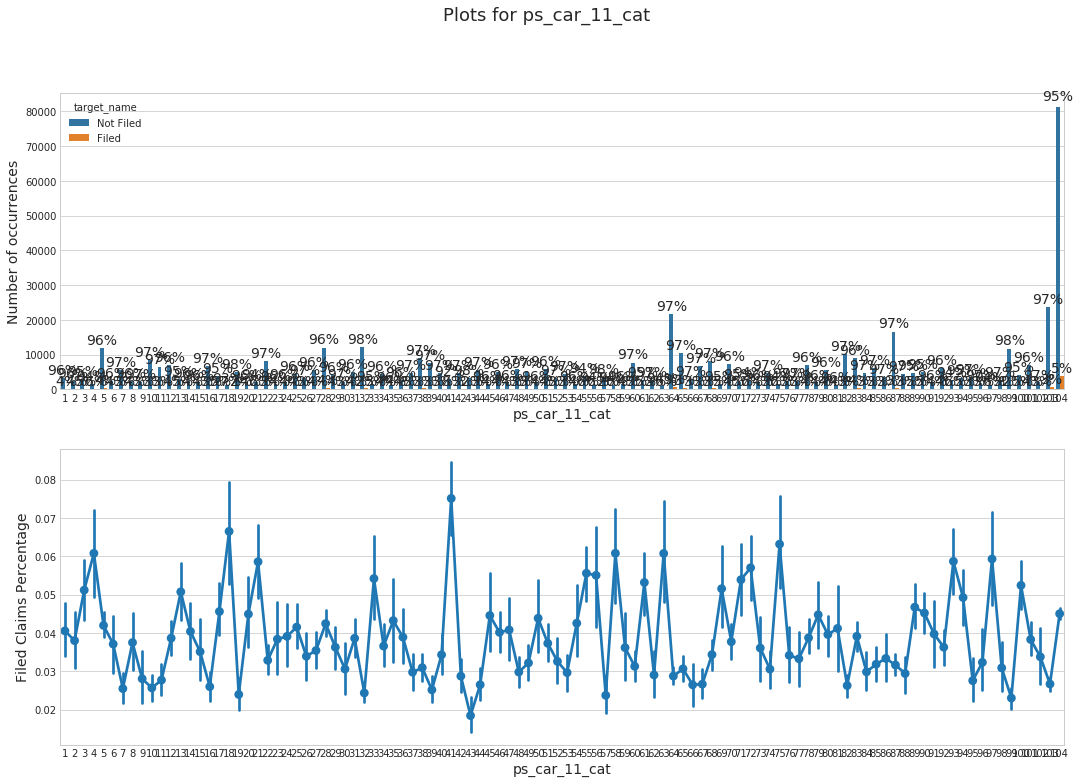

In [10]:
### Plotting Categorical Features
# Looping through and Plotting Categorical features
for column in categorical_features:
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

    
    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=train_data, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()

### Binary Features Exploration

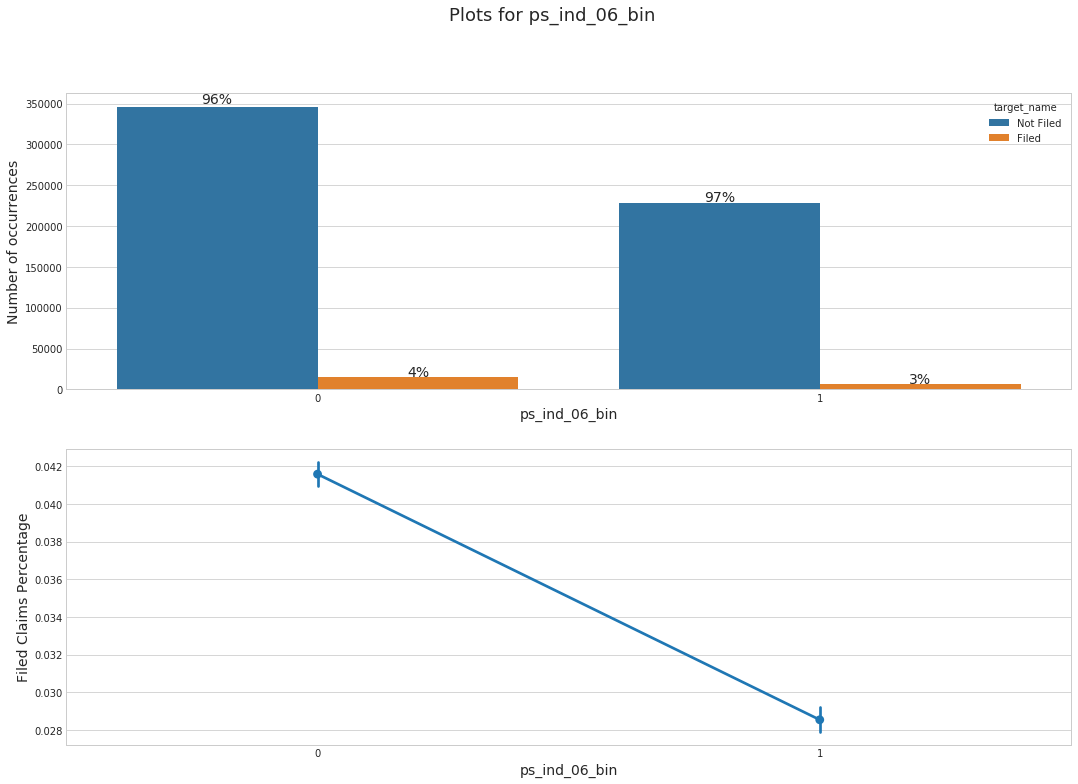

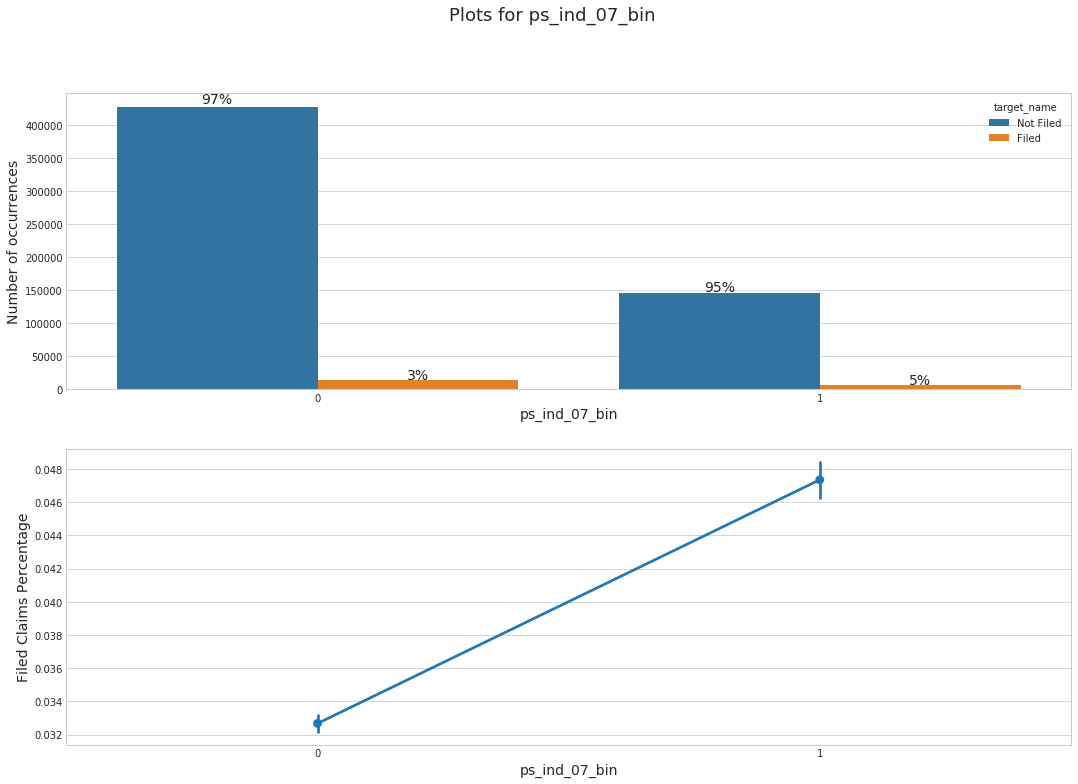

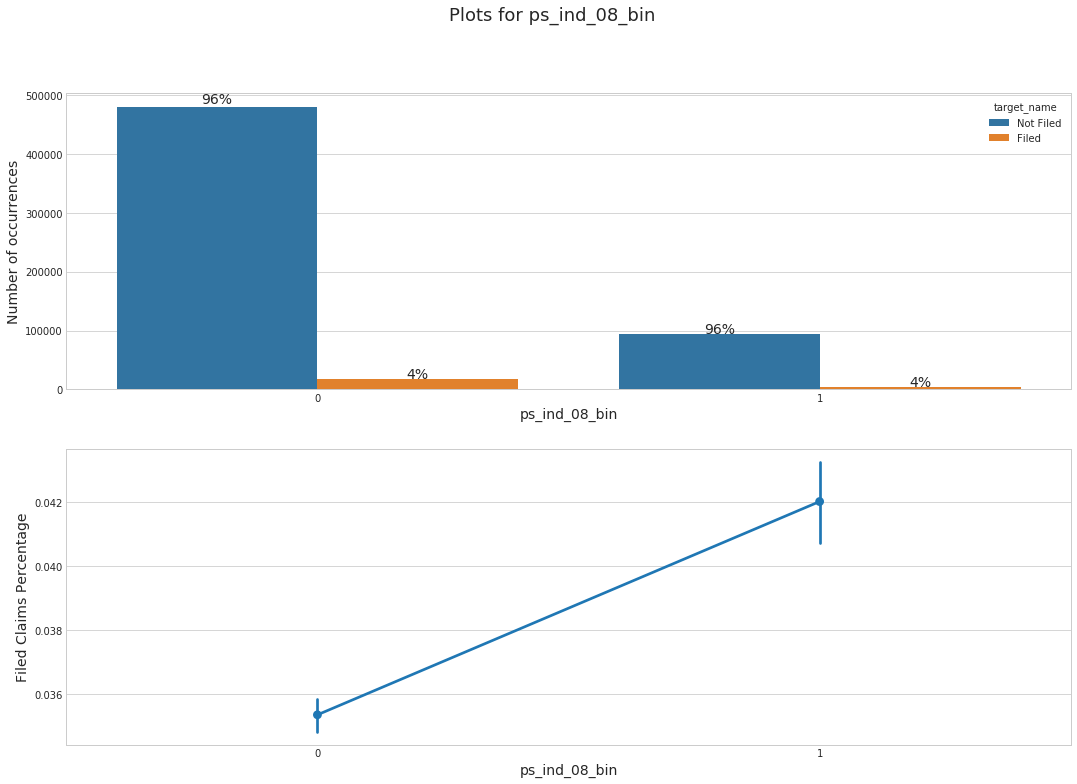

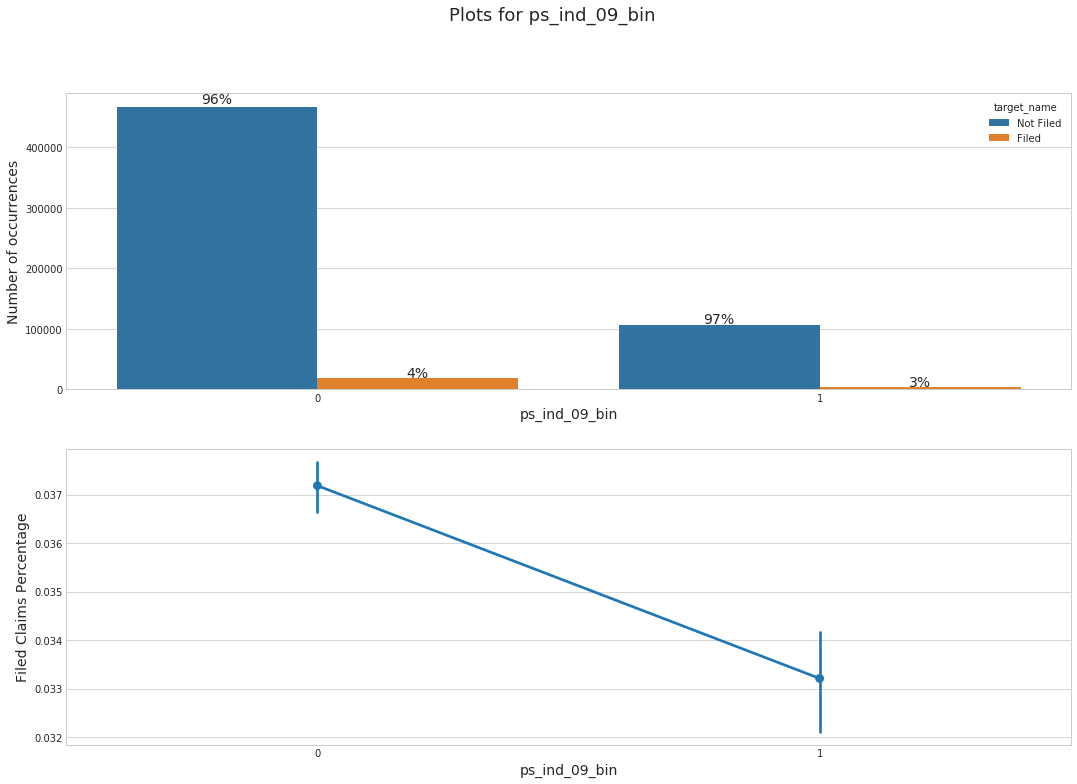

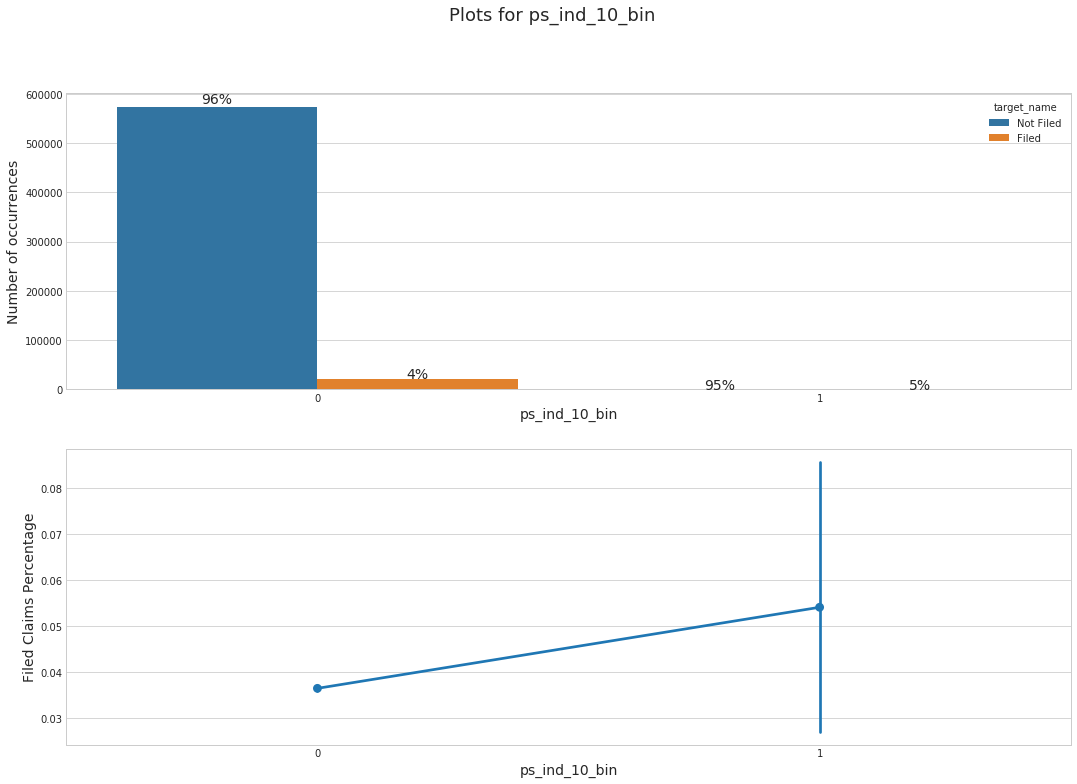

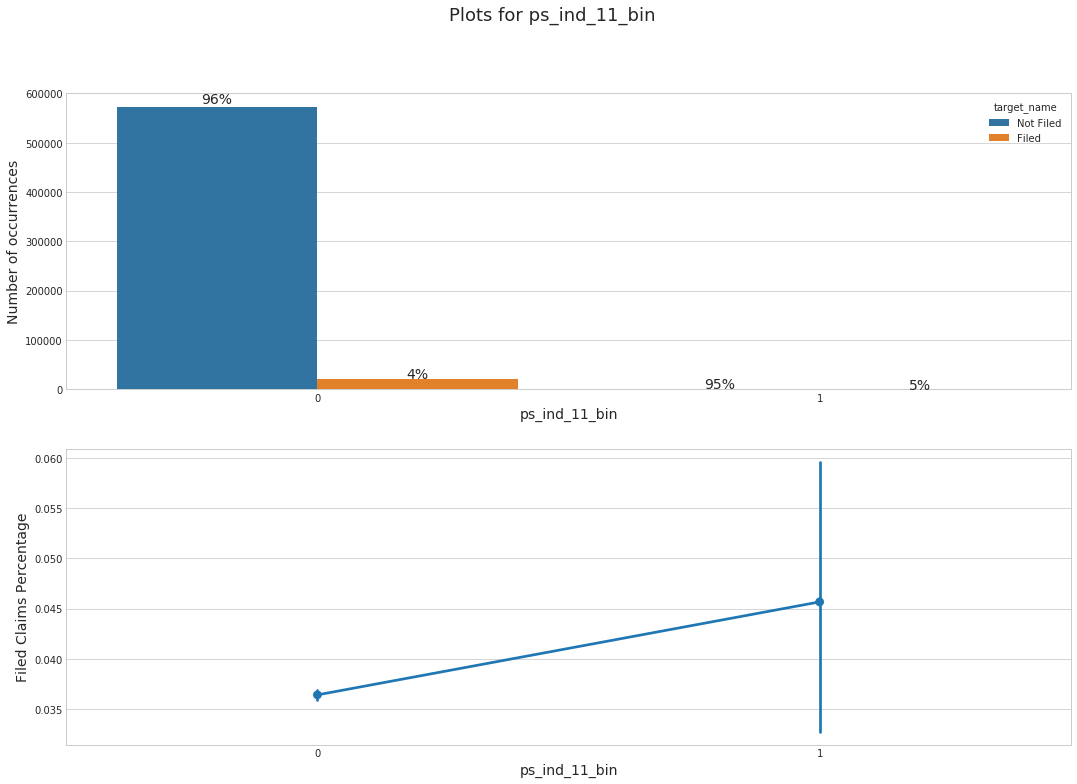

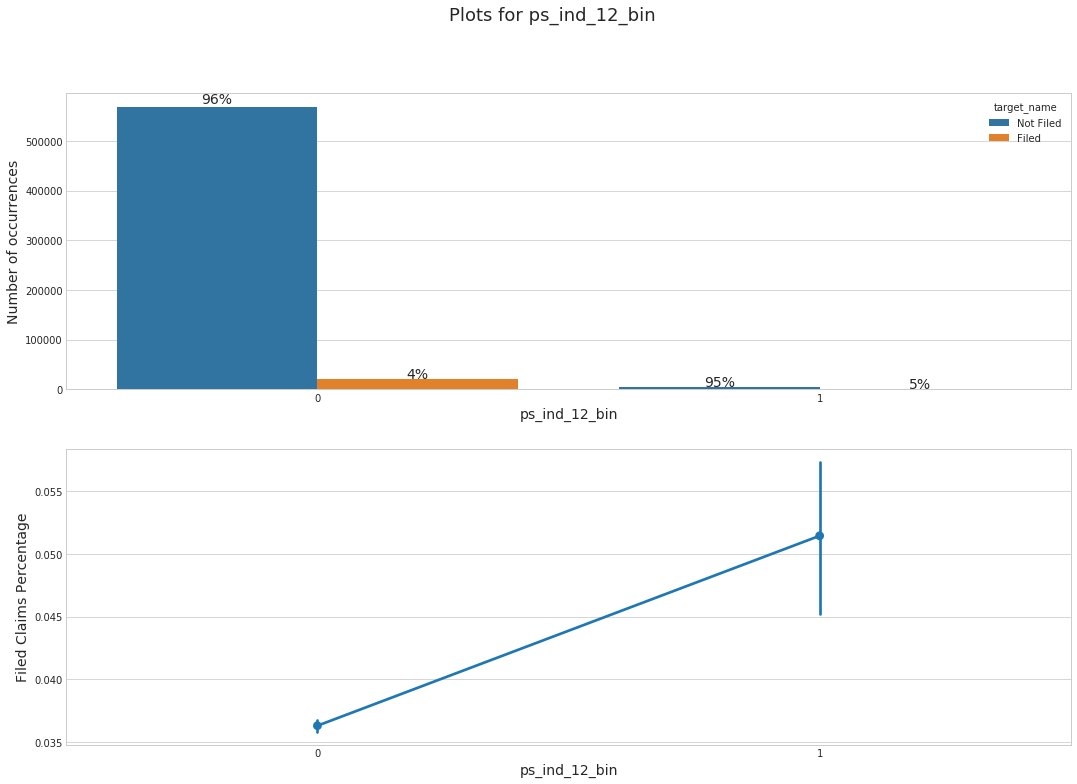

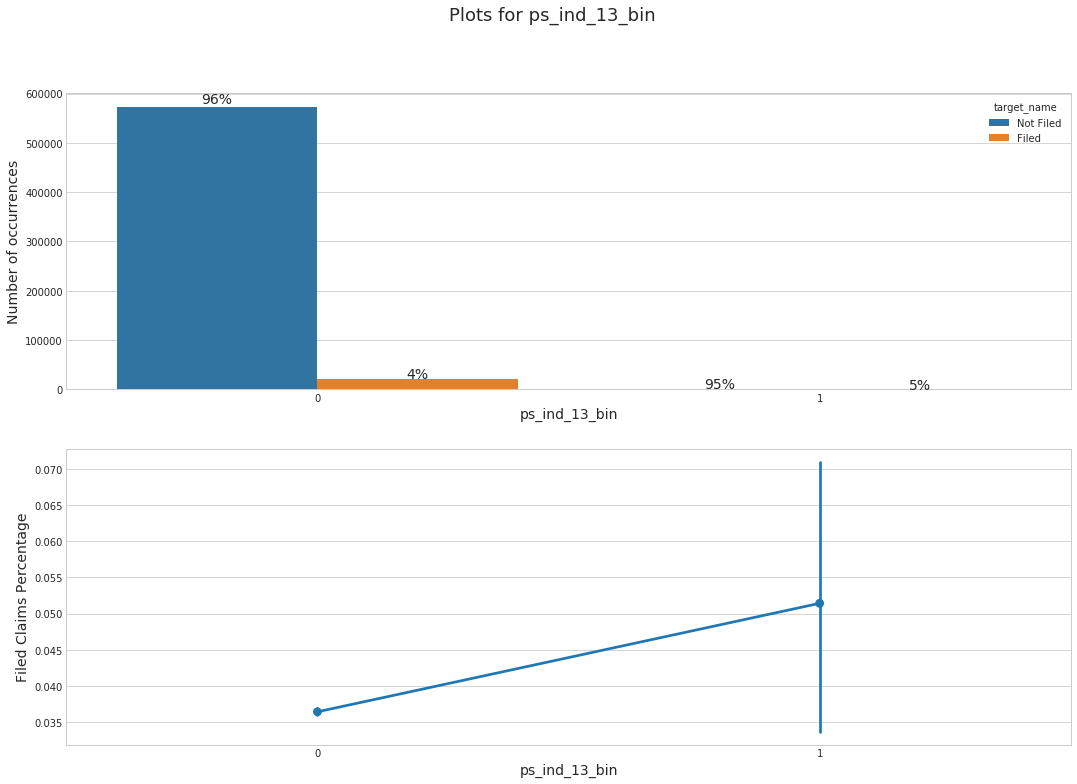

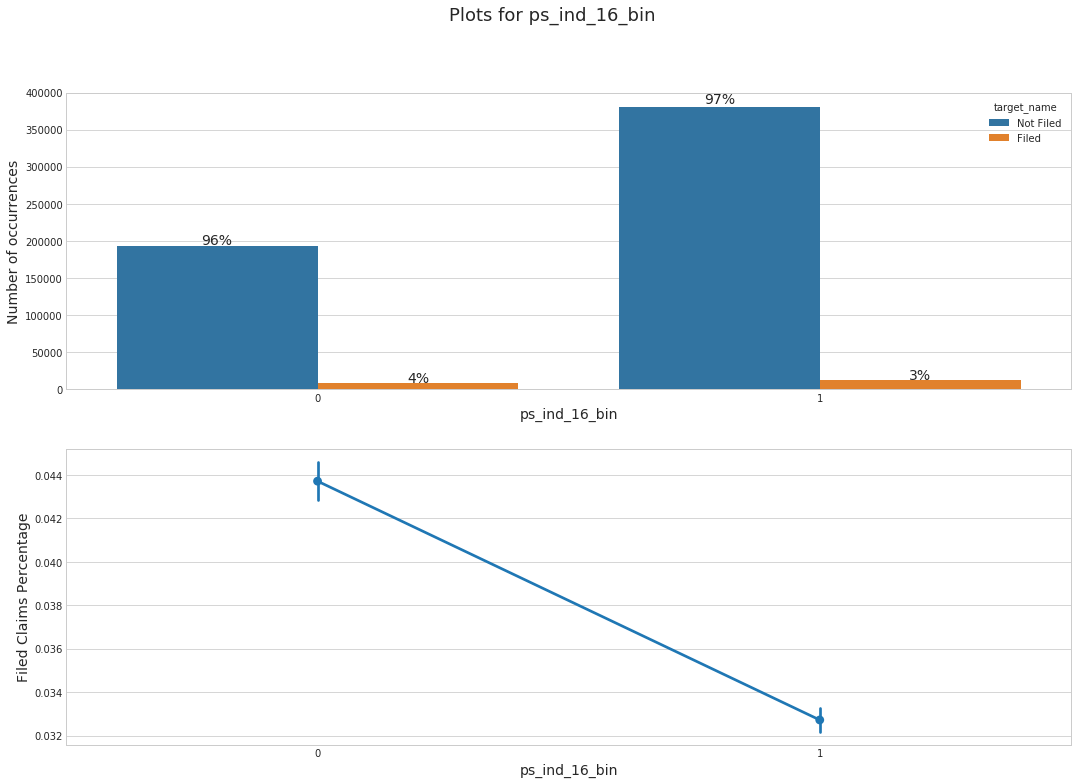

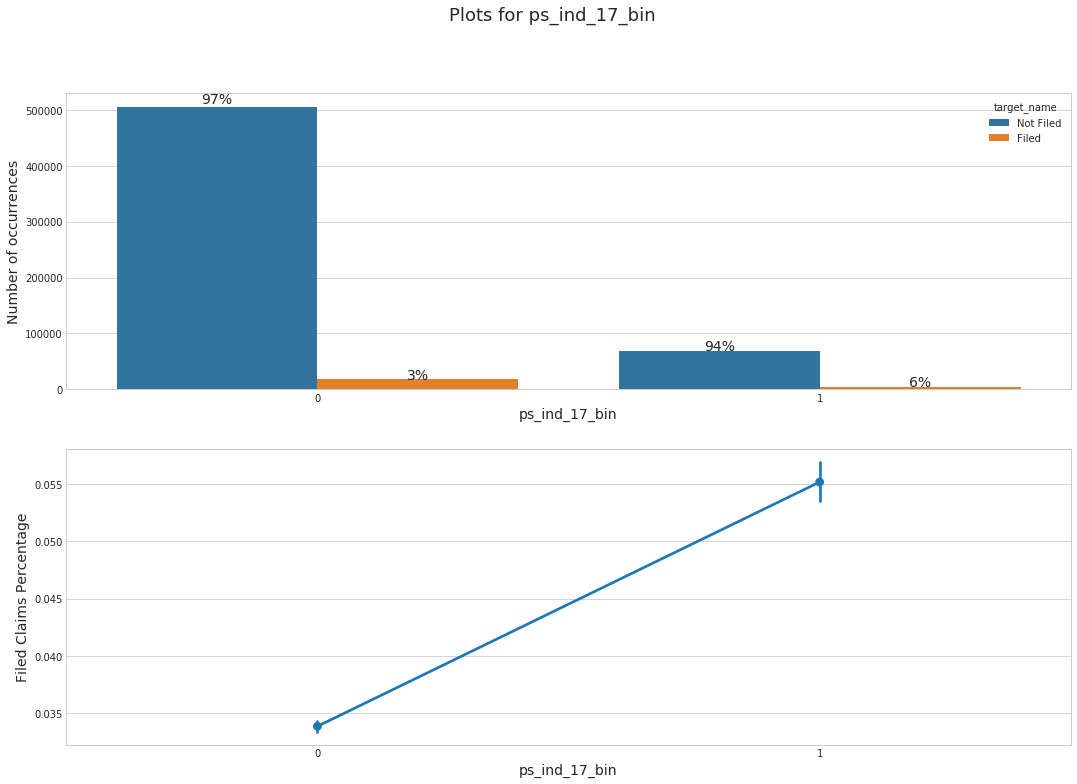

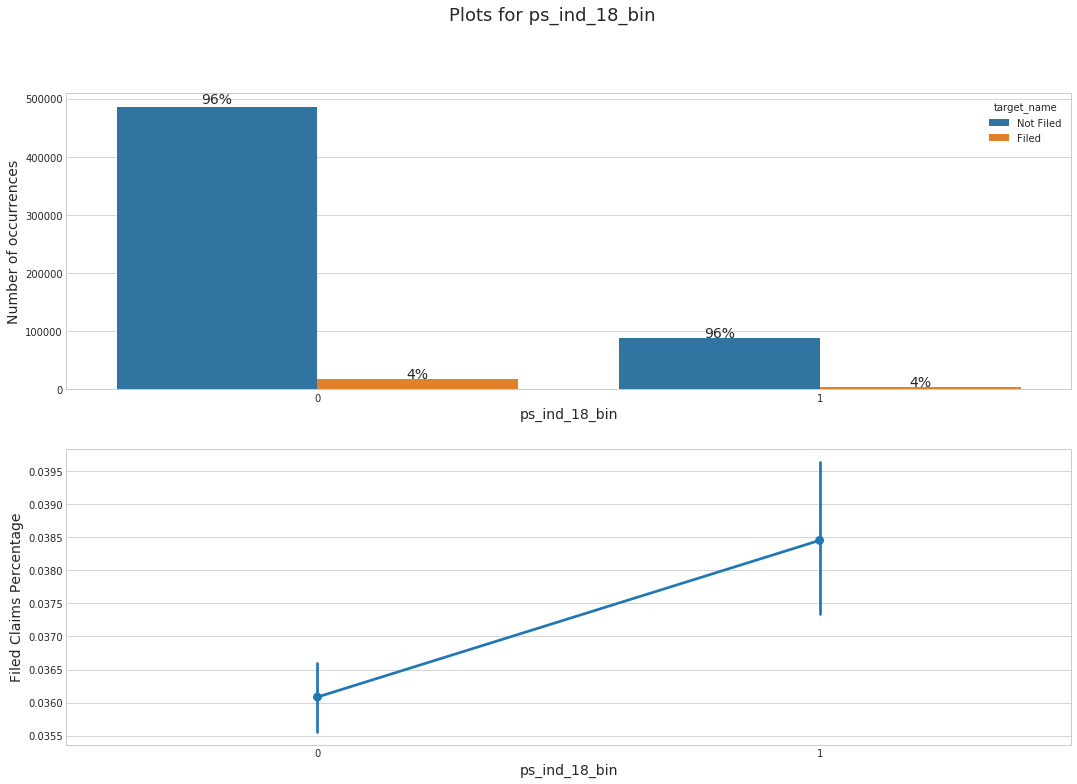

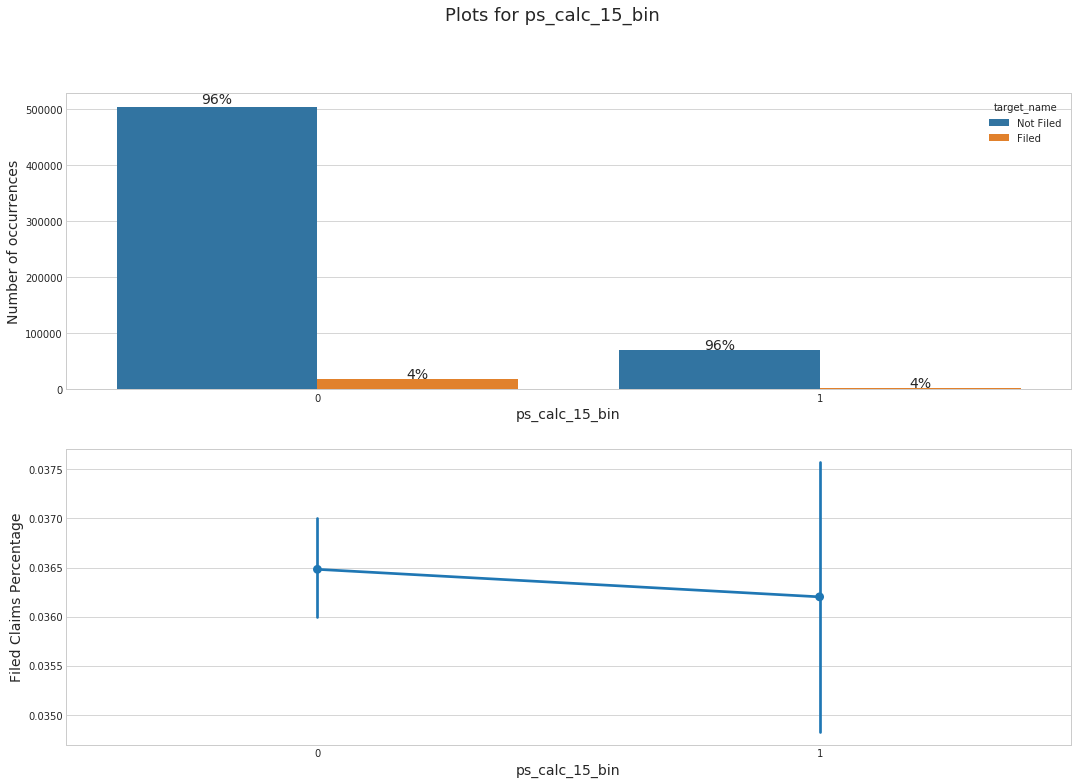

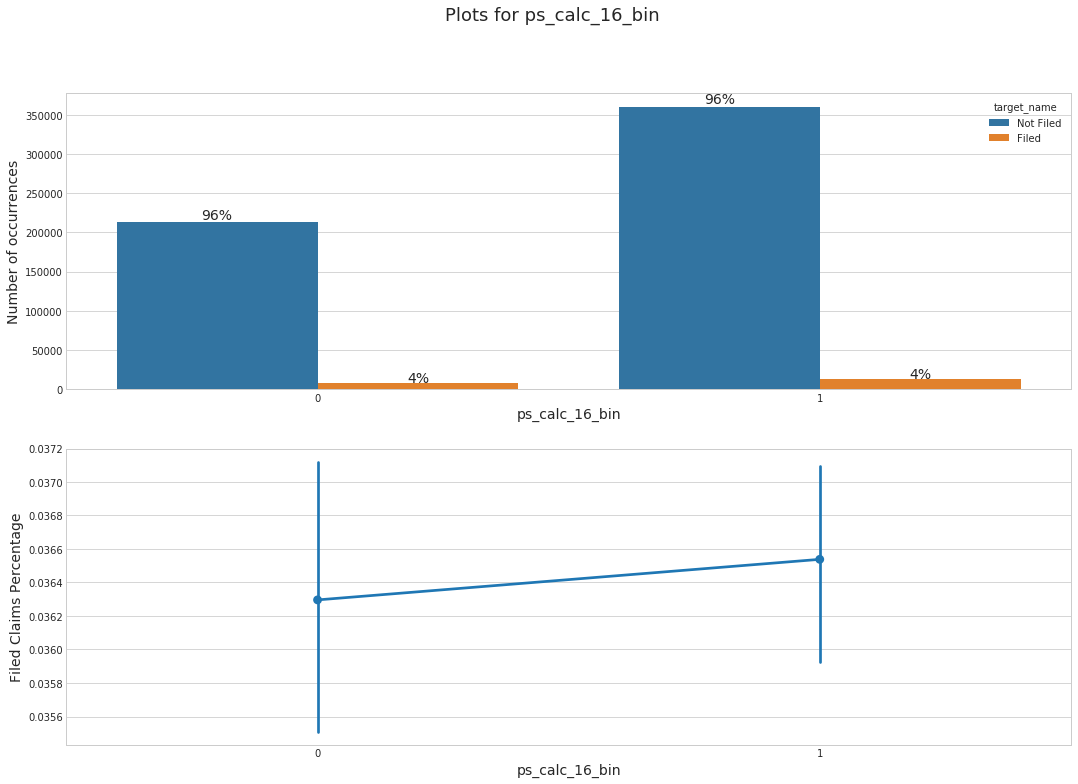

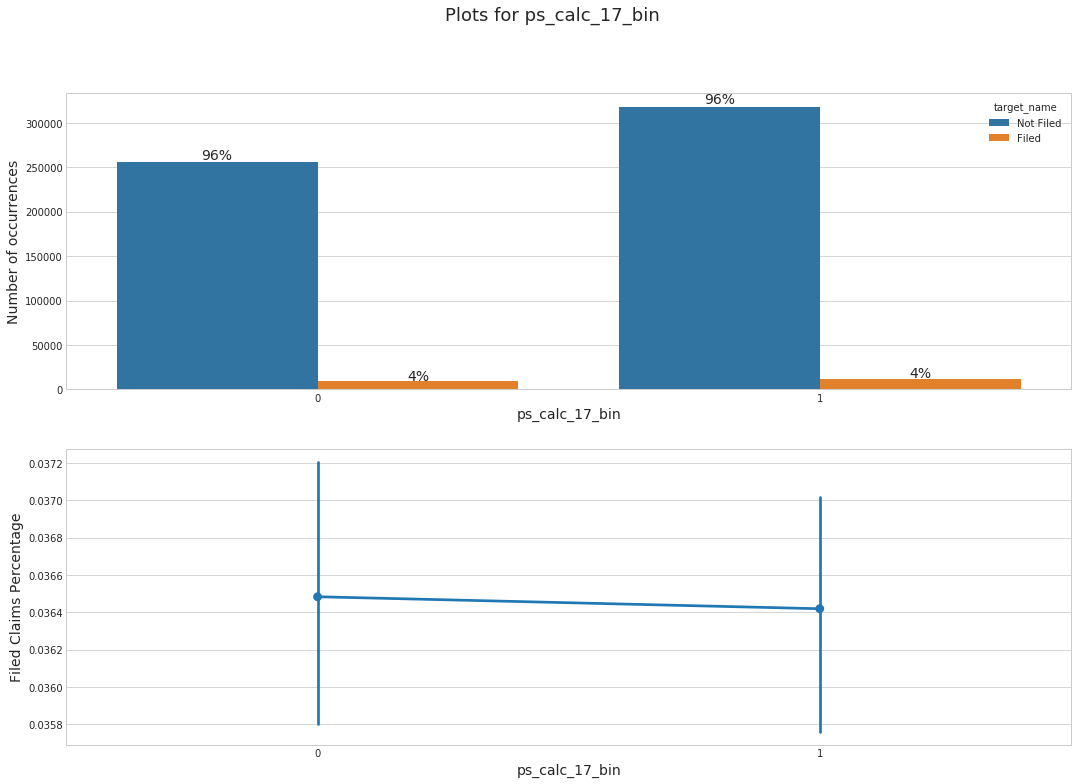

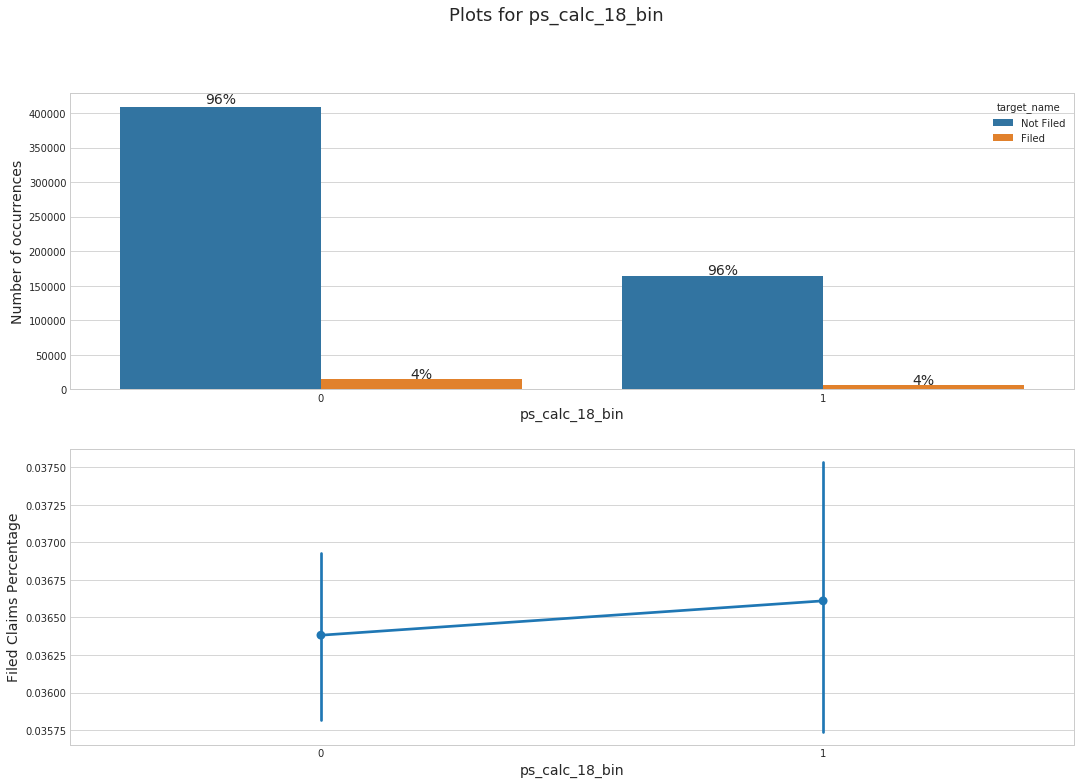

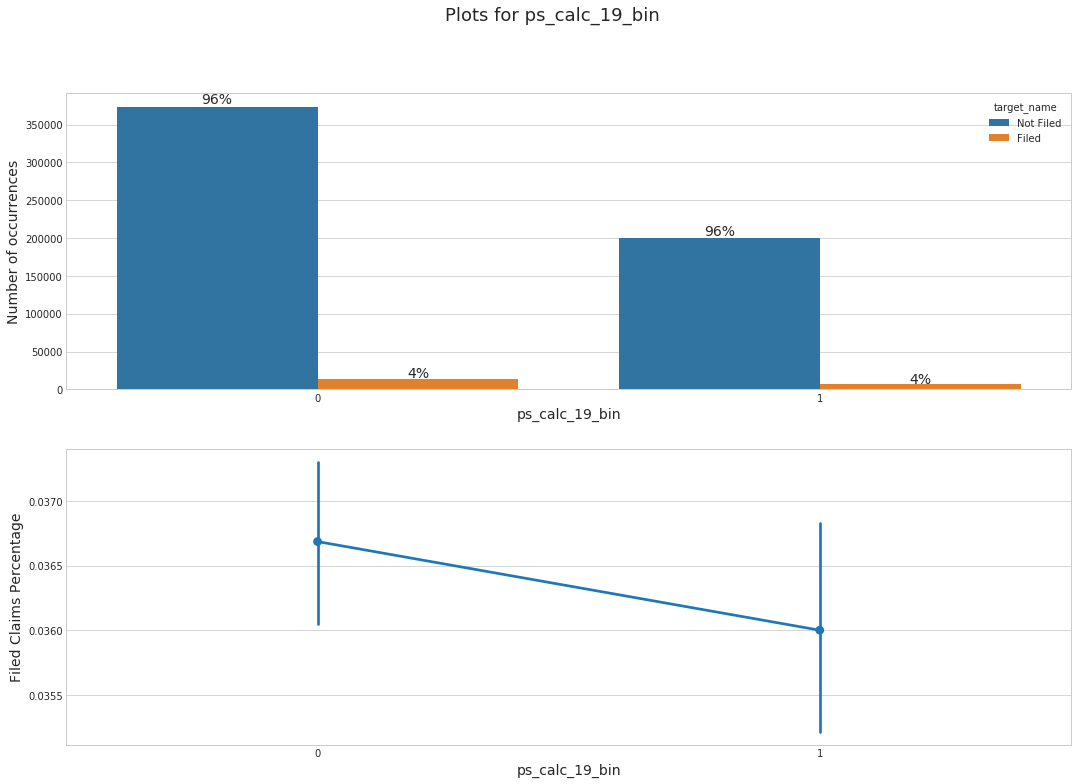

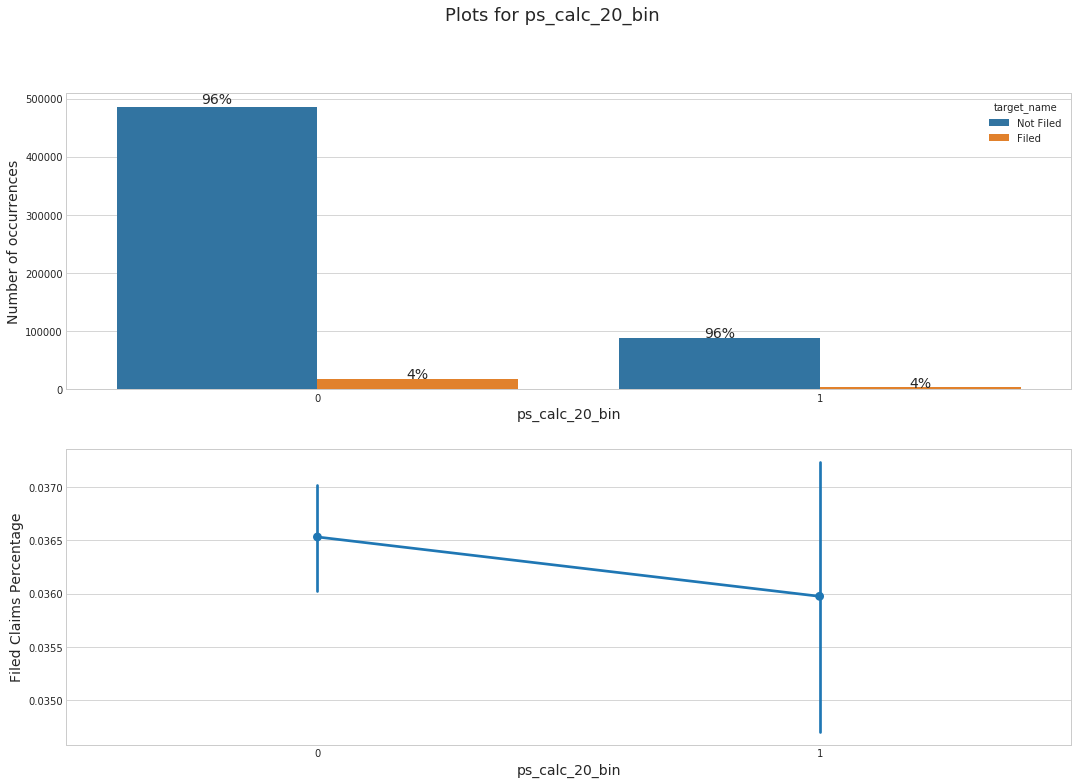

In [11]:
### Plotting Binary Features
# Looping through and Plotting Binary features
for column in binary_features:
    ### Figure initiation 
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per binary value - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 
        

    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=train_data, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()